In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
import seaborn as sns
import scipy.stats as sci
# Multicoliarity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve

#ML Package
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
#Model Evaluation Librtayr
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')




In [3]:
df = pd.read_excel('Capstone Project.xlsx')

In [4]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [5]:
# Problem Statement
# you have to build a ML model which will predict the streangh of the cement

In [6]:
df.shape

(1030, 9)

In [7]:
#EDA

In [8]:
df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [10]:
# Building a custom summery

In [11]:
# Data Preprocessing and EDA libraries

In [12]:
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict

In [13]:
def custom_summery(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtype != 'object':
            stats = OrderedDict({ 
                'Feature Name' : col,
                'Count' : my_df[col].count().sum(),
                'Minimum' : my_df[col].min(),
                'Quartile1' : my_df[col].quantile(0.25),
                'Quartile2' : my_df[col].quantile(0.5),
                'Mean' : my_df[col].mean(),
                'Quartile3' : my_df[col].quantile(0.75),
                'Maximum' : my_df[col].max(),
                'Variance' : my_df[col].var(),
                'Standard Deviation' : my_df[col].std(),
                'Skewness' : my_df[col].skew(),
                'Kurtosis' : my_df[col].kurt()
                })
            result.append(stats)
    result_df = pd.DataFrame(result)
    #Skewness Type
    Skewness_lable = []
    for i in result_df['Skewness']:
        if i <= -1:
            Skewness_lable.append('Highly Negayively Skewed')
        elif -1 < i <= -0.5:
            Skewness_lable.append('Moderately Negayively Skewed')
        elif -0.5 < i < 0:
            Skewness_lable.append('Fairly negetivelyc screwed')
        elif 0 <= i < 0.5:
            Skewness_lable.append('Fairly positivly Skewed')
        elif 0.5<= i < 0.5:
            Skewness_lable.append('Moderately positively Skewed')
        else:
            Skewness_lable.append('Highly positively Skewed')
    result_df['Skewness Comment'] = Skewness_lable
    #Kurtosis_Type
    Kurtosis_label = []
    for i in result_df['Kurtosis']:
        if i >=1:
            Kurtosis_label.append('Leptokurtic curve')
        elif i <= -1:
            Kurtosis_label.append('Platykurtic curve')
        else:
            Kurtosis_label.append('Mesokurtic curve') 
    result_df['Kurtosis Comment'] = Kurtosis_label
    return result_df

In [14]:
custom_summery(df)

Feature Name  Count  Minimum  Quartile1  Quartile2        Mean  Quartile3  \
0        cement   1030   102.00    192.375    272.900  281.167864    350.000   
1          slag   1030     0.00      0.000     22.000   73.895825    142.950   
2           ash   1030     0.00      0.000      0.000   54.188350    118.300   
3         water   1030   121.80    164.900    185.000  181.567282    192.000   
4  superplastic   1030     0.00      0.000      6.400    6.204660     10.200   
5     coarseagg   1030   801.00    932.000    968.000  972.918932   1029.400   
6       fineagg   1030   594.00    730.950    779.500  773.580485    824.000   
7           age   1030     1.00      7.000     28.000   45.662136     56.000   
8      strength   1030     2.33     23.710     34.445   35.817961     46.135   

   Maximum      Variance  Standard Deviation  Skewness   Kurtosis  \
0    540.0  10921.580220          104.506364  0.509481  -0.520652   
1    359.4   7444.124812           86.279342  0.800717  -0.508175   
2    200.1   4095.616541           63.997004  0.537354  -1.328746   
3    247.0    456.002651           21.354219  0.074628   0.122082   
4     32.2     35.686781            5.973841  0.907203   1.411269   
5   1145.0   6045.677357           77.753954 -0.040220  -0.599016   
6    992.6   6428.187792           80.175980 -0.253010  -0.102177   
7    365.0   3990.437729           63.169912  3.269177  12.168989   
8     82.6    279.081814           16.705742  0.416977  -0.313725   

             Skewness Comment   Kurtosis Comment  
0    Highly positively Skewed   Mesokurtic curve  
1    Highly positively Skewed   Mesokurtic curve  
2    Highly positively Skewed  Platykurtic curve  
3     Fairly positivly Skewed   Mesokurtic curve  
4    Highly positively Skewed  Leptokurtic curve  
5  Fairly negetivelyc screwed   Mesokurtic curve  
6  Fairly negetivelyc screwed   Mesokurtic curve  
7    Highly positively Skewed  Leptokurtic curve  
8     Fairly positivly Skewed   Mesokurtic curve

In [15]:
# ODT Plot 
# 1. Descriptive plots
#2. Histogram with outlier
#3. Histogram without outlier

In [16]:
def replace_outlier(my_df, col, method ='Quartile', strategy = 'Median'):
    col_data = my_df[col]
    if method == 'Quartile':
        q1 = col_data.quantile(0.25)
        q2 = col_data.quantile(0.5)
        q3 = col_data.quantile(0.75)

        IQR = q3 -q1
        LW = q1 - 1.5*IQR
        UW = q3 + 1.5*IQR

    elif method == 'Standard Deviation':
        mean = col_data.mean()
        std = col_data.std()
        LW = mean - 2*std
        UW = mean +2*std
    else:
        print('Pass a correct method')

    outlier = my_df.loc[(col_data < UW) | (col_data > UW)]
    outlier_density = round(len(outlier)/len(my_df), 2) * 100
    if len(outlier) == 0:
        print(f'Feature {col} does not have any  outliers')
        print('\n')
    else:
        print(f'Feature {col} HAs outliers')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outlier)}')
        print('\n')
        print(f'outlier percentage in {col} is {outlier_density}%')
        print('\n')
        display(my_df[(col_data > UW)])

    if strategy == 'Median':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = q2
    elif strategy == 'Mean':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = mean
    else:
        print('pass a correct strategy')

    return my_df
        
        

In [17]:
def odt_plots(my_df, col):
    f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (25,8))
    sns.boxplot(my_df[col], ax =ax1)
    ax1.set_title(col + 'Boxplot')
    ax1.set_xlabel('values')
    ax1.set_ylabel('Boxplot')
    
    sns.distplot(my_df[col], ax = ax2, fit =sci.norm)
    ax2.axvline(my_df[col].mean(), color = 'green')
    ax2.axvline(my_df[col].median(), color = 'brown')
    ax2.set_title(col + 'Histogram with outliers')
    ax2.set_ylabel('Density')
    ax2.set_xlabel('value')
    
    df_out = replace_outlier(my_df, col)

    sns.distplot(df_out[col], ax = ax3, fit =sci.norm)
    ax3.axvline(df_out[col].mean(), color = 'green')
    ax3.axvline(df_out[col].median(), color = 'brown')
    ax3.set_title(col + 'Histogram without outliers')
    ax3.set_ylabel('Density')
    ax3.set_xlabel('value')
    plt.show()

Feature cement HAs outliers


Total number of outliers in cement are 1030


outlier percentage in cement is 100.0%




Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

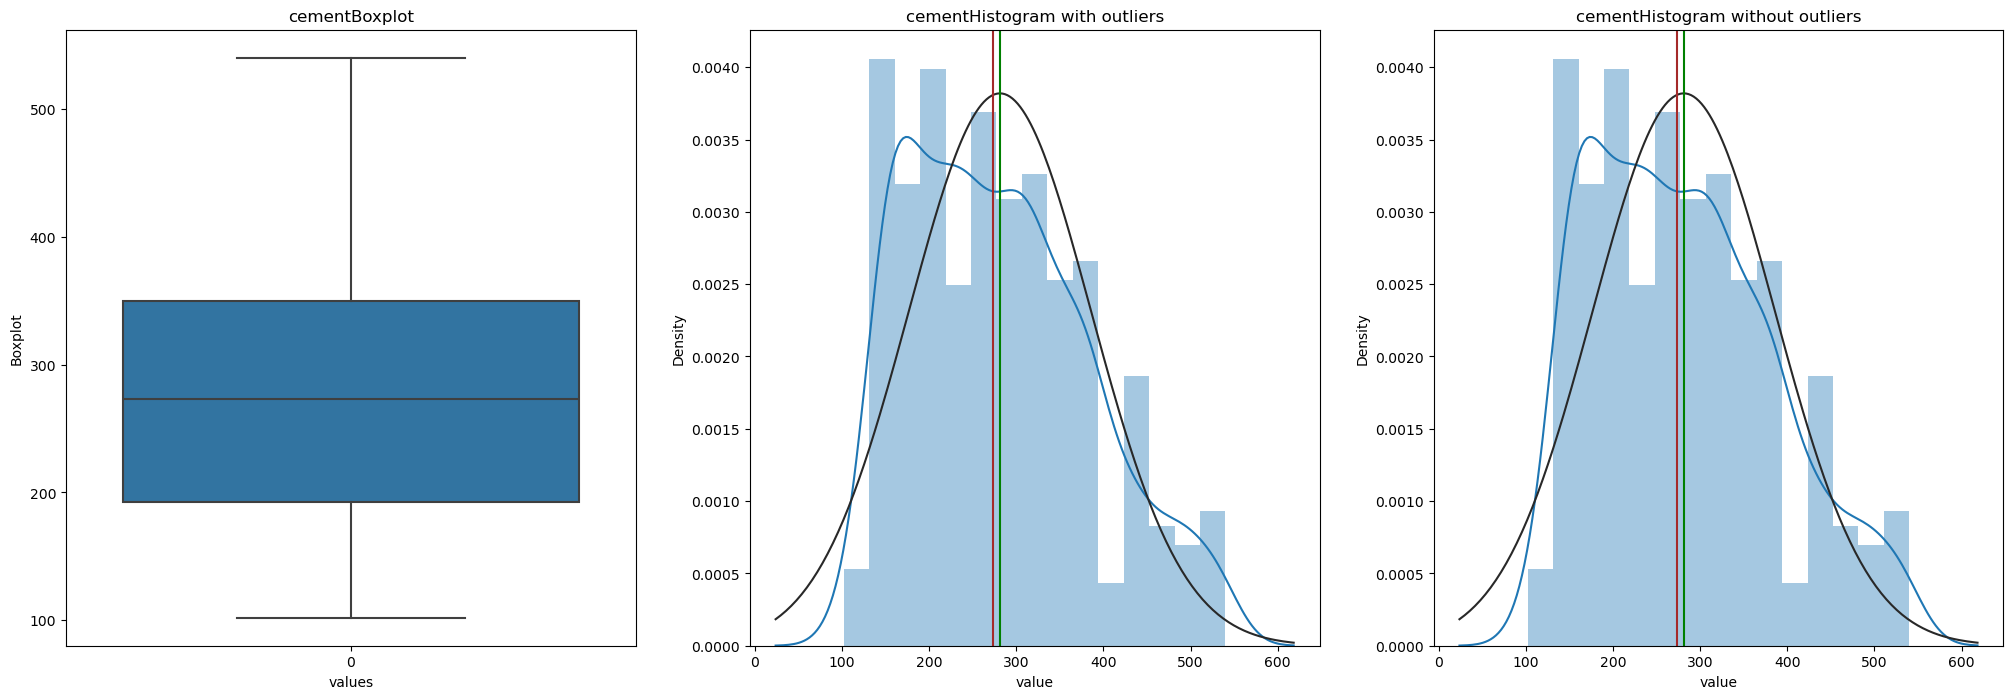

Feature slag HAs outliers


Total number of outliers in slag are 1030


outlier percentage in slag is 100.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
918   239.6  359.4  0.0  185.7           0.0      941.6    664.3   28   
990   239.6  359.4  0.0  185.7           0.0      941.6    664.3    7   

     strength  
918     39.44  
990     25.42

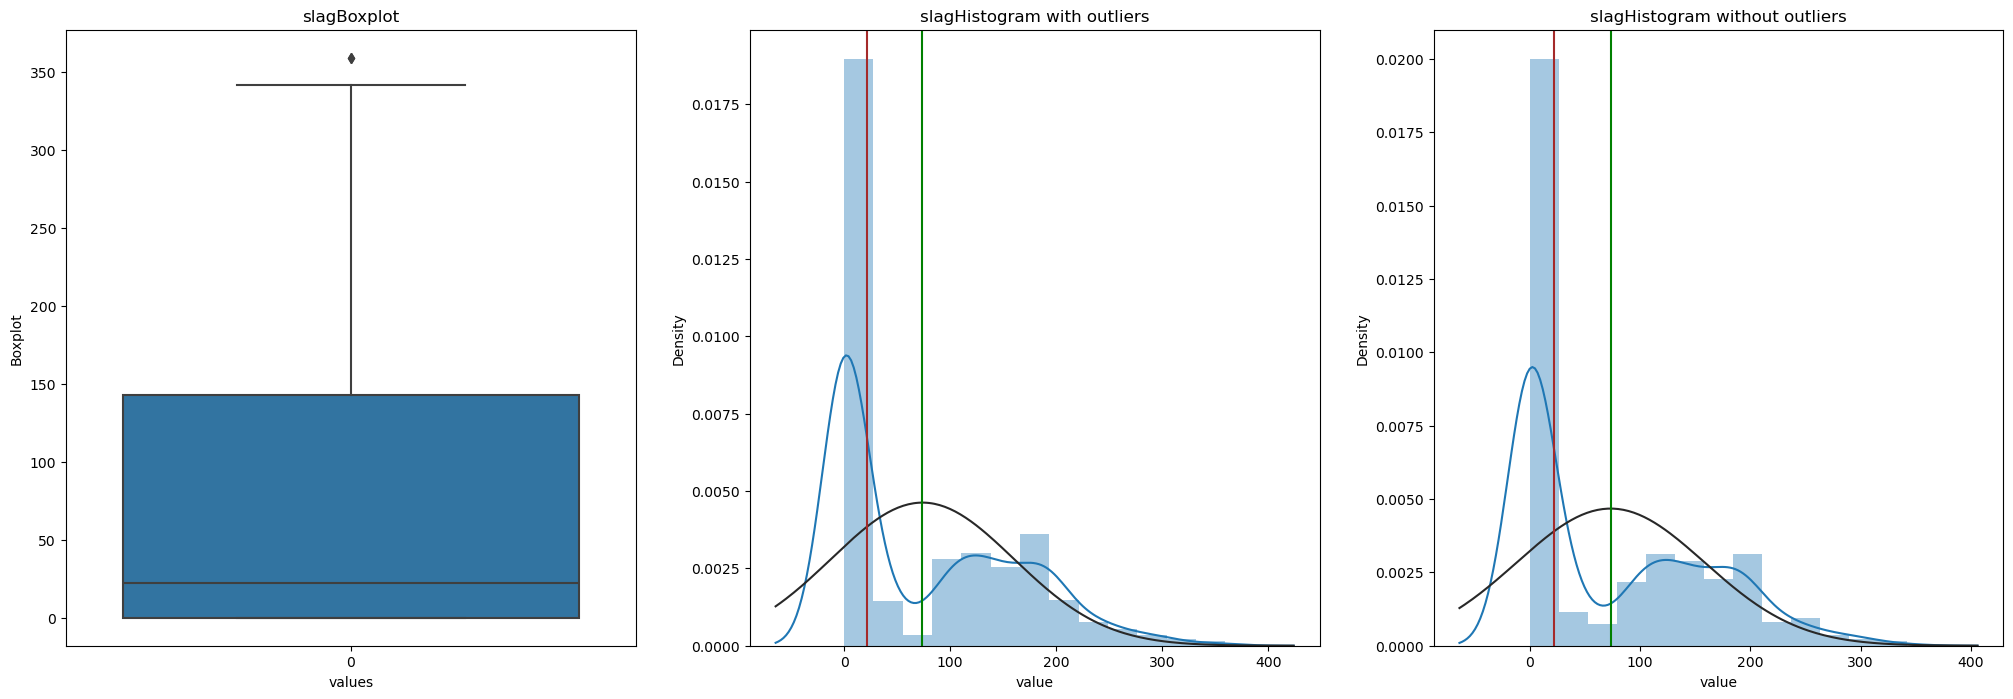

Feature ash HAs outliers


Total number of outliers in ash are 1030


outlier percentage in ash is 100.0%




Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

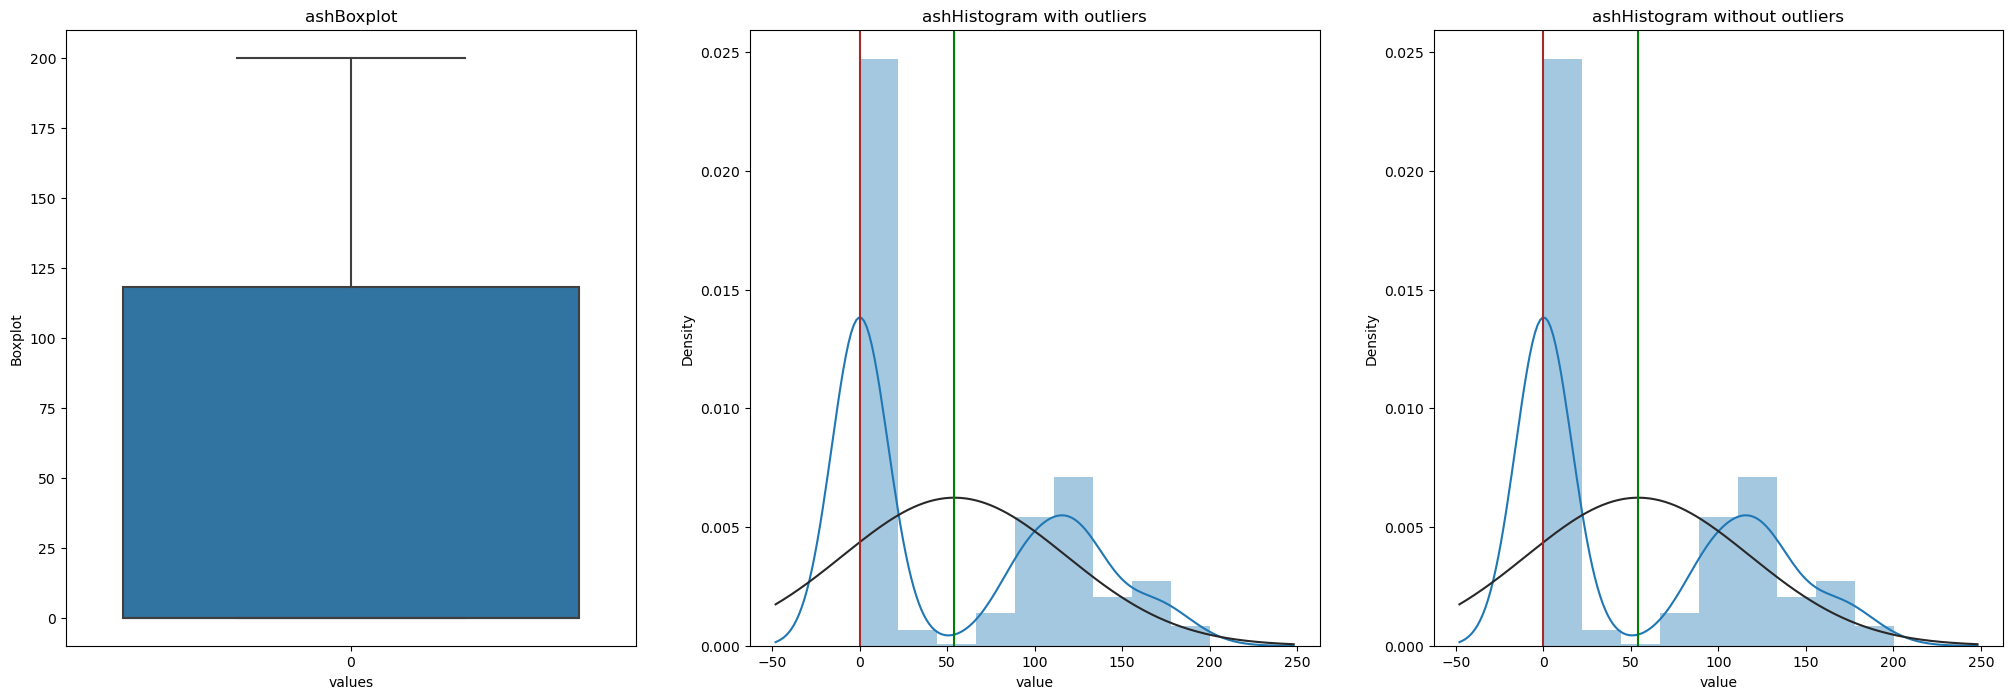

Feature water HAs outliers


Total number of outliers in water are 1030


outlier percentage in water is 100.0%




cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
66    237.0   92.0   71.0  247.0           6.0      853.0    695.0   28   
263   236.9   91.7   71.5  246.9           6.0      852.9    695.4   28   
740   140.0  164.0  128.0  237.0           6.0      869.0    656.0   28   
826   139.7  163.9  127.7  236.7           5.8      868.6    655.6   28   

     strength  
66      28.63  
263     28.63  
740     35.23  
826     35.23

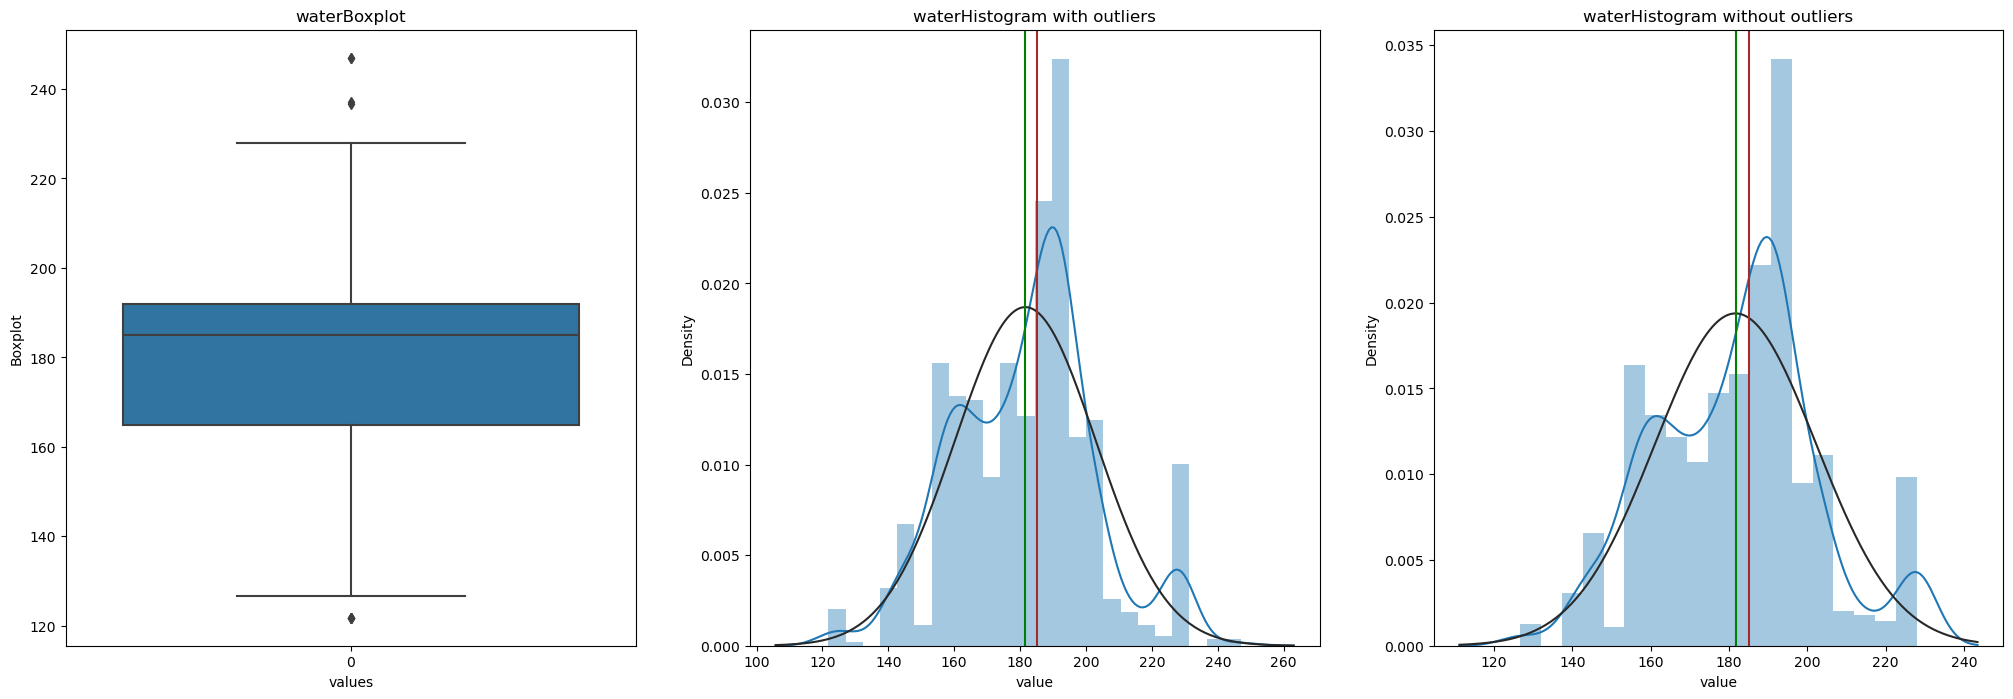

Feature superplastic HAs outliers


Total number of outliers in superplastic are 1030


outlier percentage in superplastic is 100.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
44     531.3    0.0  0.0  141.8          28.2      852.1    893.7   91   
156    531.3    0.0  0.0  141.8          28.2      852.1    893.7   28   
232    469.0  117.2  0.0  137.8          32.2      852.1    840.5   56   
292    469.0  117.2  0.0  137.8          32.2      852.1    840.5   91   
538    531.3    0.0  0.0  141.8          28.2      852.1    893.7    7   
744    469.0  117.2  0.0  137.8          32.2      852.1    840.5    7   
816    469.0  117.2  0.0  137.8          32.2      852.1    840.5   28   
838    531.3    0.0  0.0  141.8          28.2      852.1    893.7   56   
955    469.0  117.2  0.0  137.8          32.2      852.1    840.5    3   
1026   531.3    0.0  0.0  141.8          28.2      852.1    893.7    3   

      strength  
44        59.2  
156       56.4  
232       69.3  
292       70.7  
538       46.9  
744       54.9  
816       66.9  
838       58.8  
955       40.2  
1026      41.3

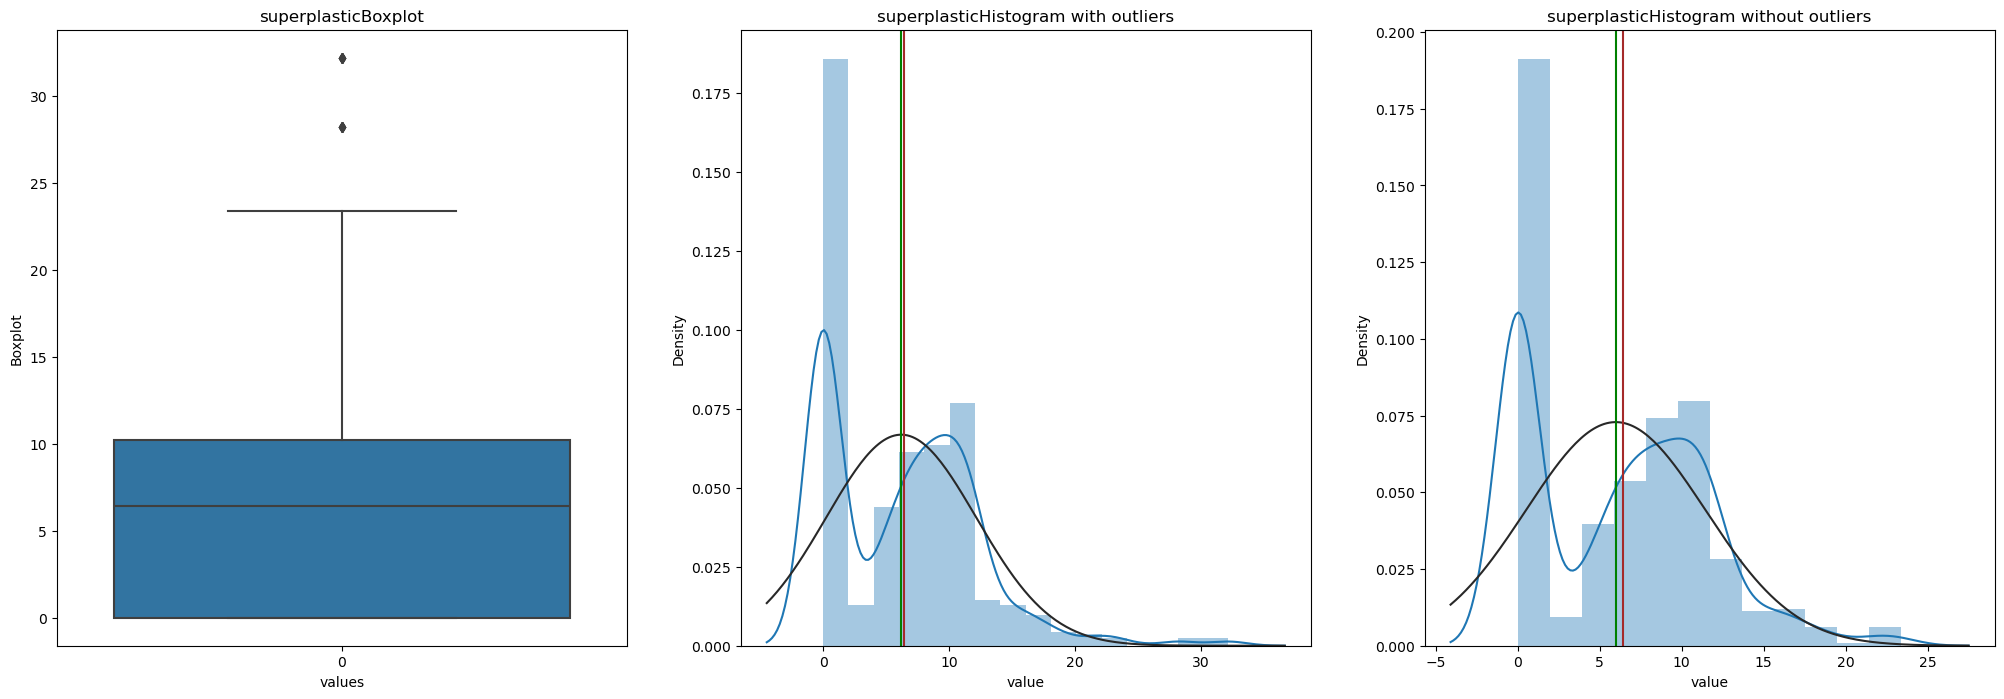

Feature coarseagg HAs outliers


Total number of outliers in coarseagg are 1030


outlier percentage in coarseagg is 100.0%




Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

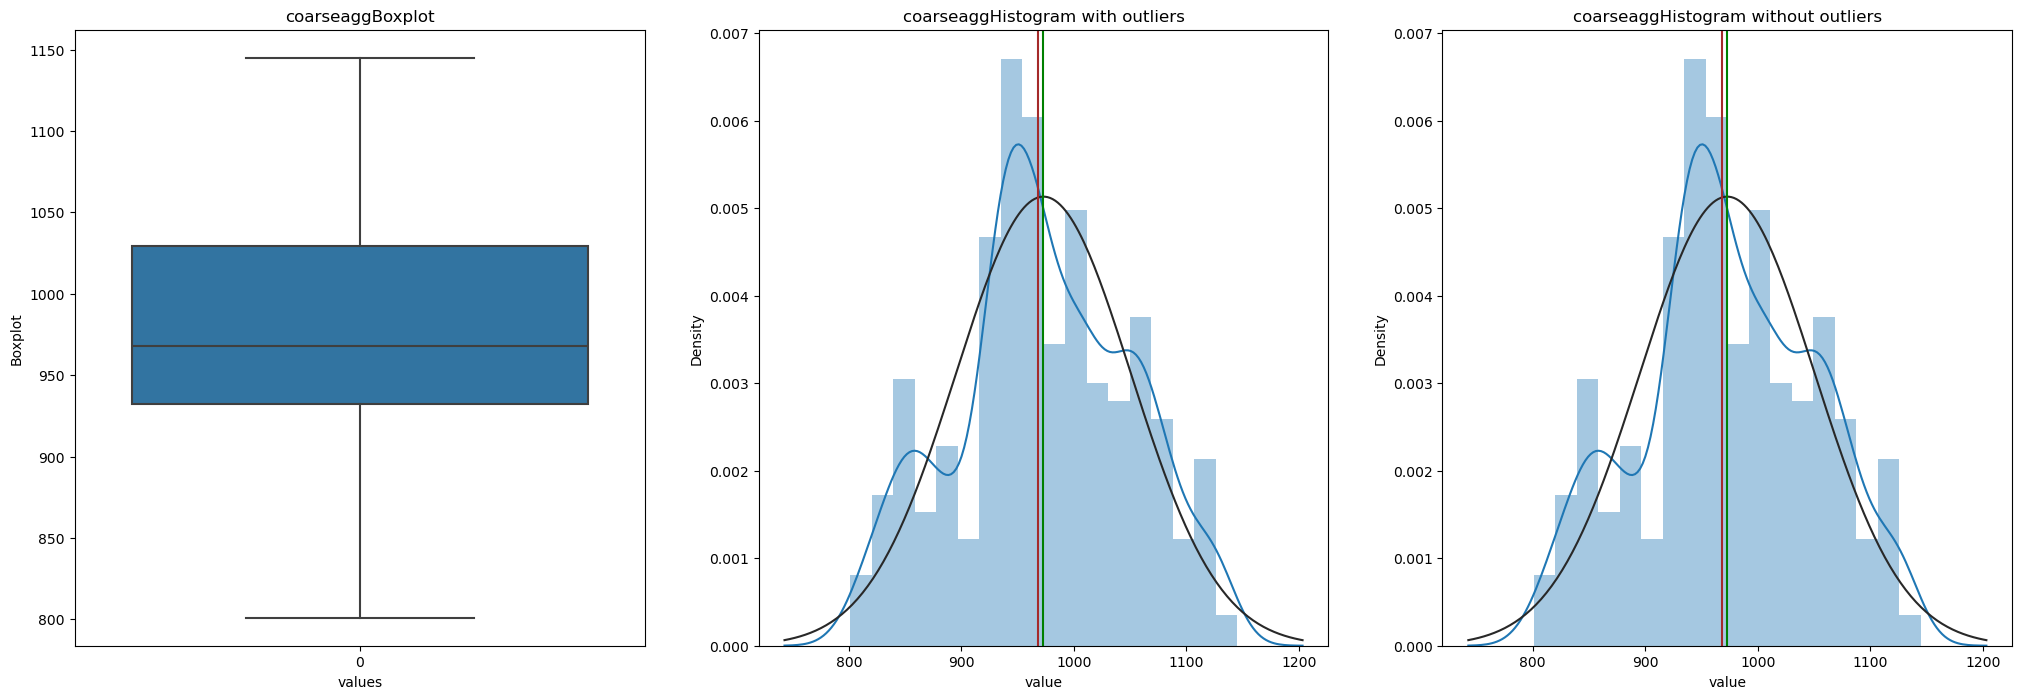

Feature fineagg HAs outliers


Total number of outliers in fineagg are 1030


outlier percentage in fineagg is 100.0%




cement  slag  ash  water  superplastic  coarseagg  fineagg  age  strength
129   375.0  93.8  0.0  126.6          23.4      852.1    992.6   91      62.5
447   375.0  93.8  0.0  126.6          23.4      852.1    992.6    7      45.7
504   375.0  93.8  0.0  126.6          23.4      852.1    992.6    3      29.0
584   375.0  93.8  0.0  126.6          23.4      852.1    992.6   56      60.2
857   375.0  93.8  0.0  126.6          23.4      852.1    992.6   28      56.7

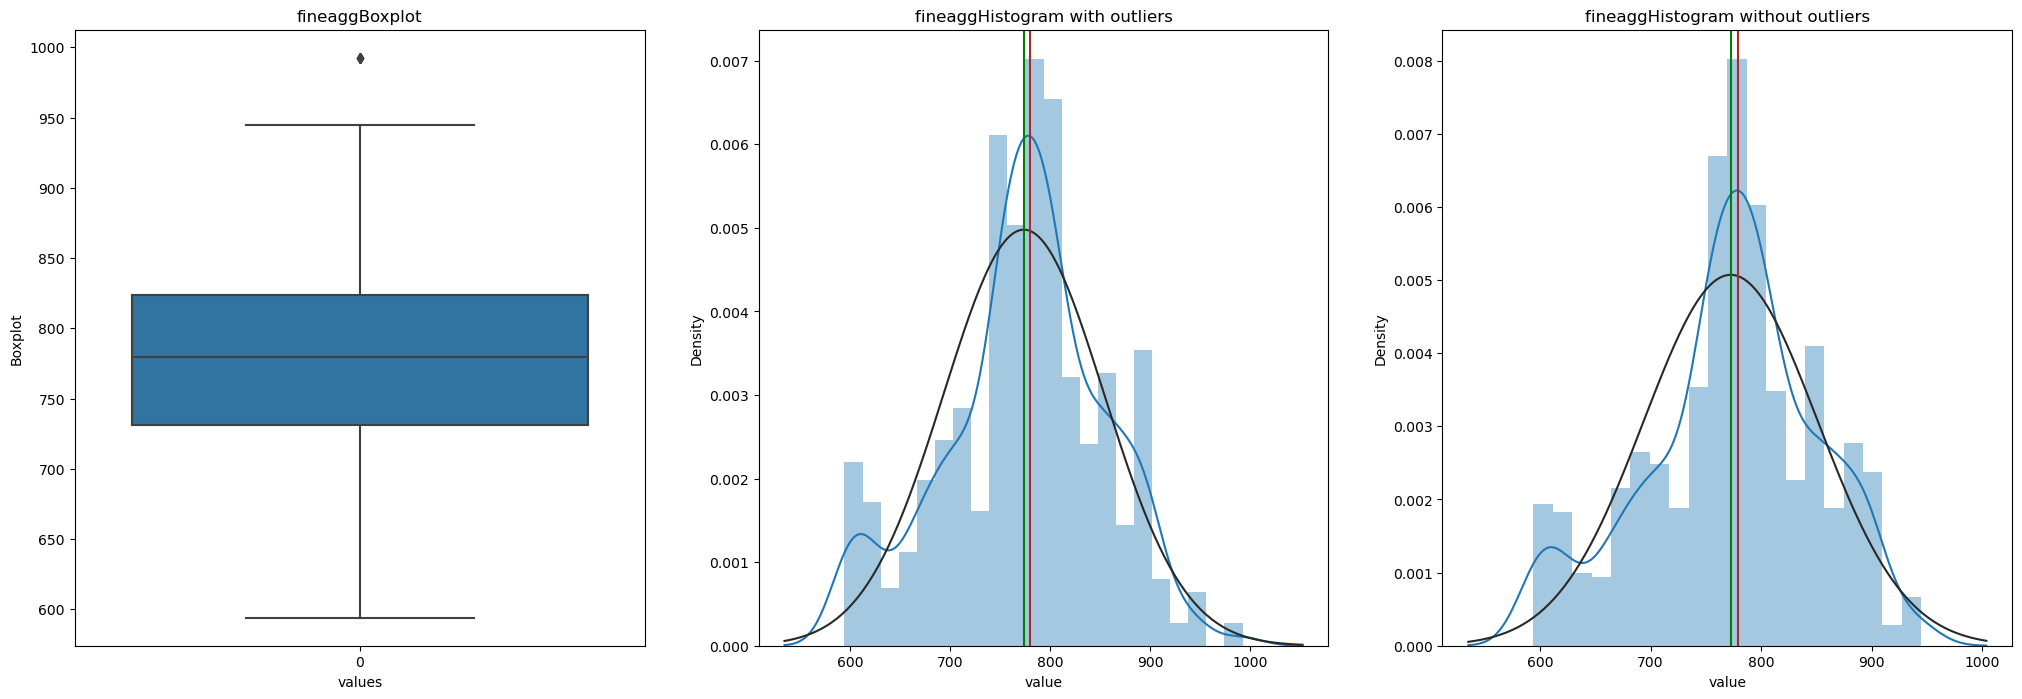

Feature age HAs outliers


Total number of outliers in age are 1030


outlier percentage in age is 100.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
51     331.0    0.0  0.0  192.0           0.0      978.0    825.0  180   
64     332.5  142.5  0.0  228.0           0.0      932.0    594.0  365   
93     427.5   47.5  0.0  228.0           0.0      932.0    594.0  180   
99     237.5  237.5  0.0  228.0           0.0      932.0    594.0  180   
103    380.0    0.0  0.0  228.0           0.0      932.0    670.0  180   
133    236.0    0.0  0.0  193.0           0.0      968.0    885.0  365   
144    302.0    0.0  0.0  203.0           0.0      974.0    817.0  180   
149    380.0   95.0  0.0  228.0           0.0      932.0    594.0  270   
152    322.0    0.0  0.0  203.0           0.0      974.0    800.0  180   
157    198.6  132.4  0.0  192.0           0.0      978.4    825.5  360   
159    304.0   76.0  0.0  228.0           0.0      932.0    670.0  365   
198    266.0  114.0  0.0  228.0           0.0      932.0    670.0  365   
199    277.0    0.0  0.0  191.0           0.0      968.0    856.0  180   
207    190.0  190.0  0.0  228.0           0.0      932.0    670.0  180   
256    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  270   
262    266.0  114.0  0.0  228.0           0.0      932.0    670.0  270   
270    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  270   
297    475.0    0.0  0.0  228.0           0.0      932.0    594.0  270   
302    342.0   38.0  0.0  228.0           0.0      932.0    670.0  180   
312    236.0    0.0  0.0  193.0           0.0      968.0    885.0  180   
313    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  270   
323    139.6  209.4  0.0  192.0           0.0     1047.0    806.9  360   
359    475.0    0.0  0.0  228.0           0.0      932.0    594.0  180   
361    277.0    0.0  0.0  191.0           0.0      968.0    856.0  360   
370    266.0  114.0  0.0  228.0           0.0      932.0    670.0  180   
393    342.0   38.0  0.0  228.0           0.0      932.0    670.0  365   
448    331.0    0.0  0.0  192.0           0.0      978.0    825.0  360   
465    427.5   47.5  0.0  228.0           0.0      932.0    594.0  365   
484    237.5  237.5  0.0  228.0           0.0      932.0    594.0  365   
539    304.0   76.0  0.0  228.0           0.0      932.0    670.0  180   
570    190.0  190.0  0.0  228.0           0.0      932.0    670.0  270   
581    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  180   
594    339.0    0.0  0.0  197.0           0.0      968.0    781.0  180   
601    339.0    0.0  0.0  197.0           0.0      968.0    781.0  365   
620    332.5  142.5  0.0  228.0           0.0      932.0    594.0  180   
622    380.0   95.0  0.0  228.0           0.0      932.0    594.0  180   
623    380.0    0.0  0.0  228.0           0.0      932.0    670.0  270   
632    304.0   76.0  0.0  228.0           0.0      932.0    670.0  270   
642    198.6  132.4  0.0  192.0           0.0      978.4    825.5  180   
696    307.0    0.0  0.0  193.0           0.0      968.0    812.0  180   
713    190.0  190.0  0.0  228.0           0.0      932.0    670.0  365   
720    380.0   95.0  0.0  228.0           0.0      932.0    594.0  365   
721    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  180   
754    254.0    0.0  0.0  198.0           0.0      968.0    863.0  365   
755    349.0    0.0  0.0  192.0           0.0     1047.0    806.0  360   
776    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  180   
850    427.5   47.5  0.0  228.0           0.0      932.0    594.0  270   
861    310.0    0.0  0.0  192.0           0.0      970.0    850.0  180   
878    237.5  237.5  0.0  228.0           0.0      932.0    594.0  270   
900    254.0    0.0  0.0  198.0           0.0      968.0    863.0  180   
901    475.0    0.0  0.0  228.0           0.0      932.0    594.0  365   
919    310.0    0.0  0.0  192.0           0.0      970.0    850.0  360   
951    332.5  142.5  0.0  228.0           0.0      932.0    594.0  270   
957    307

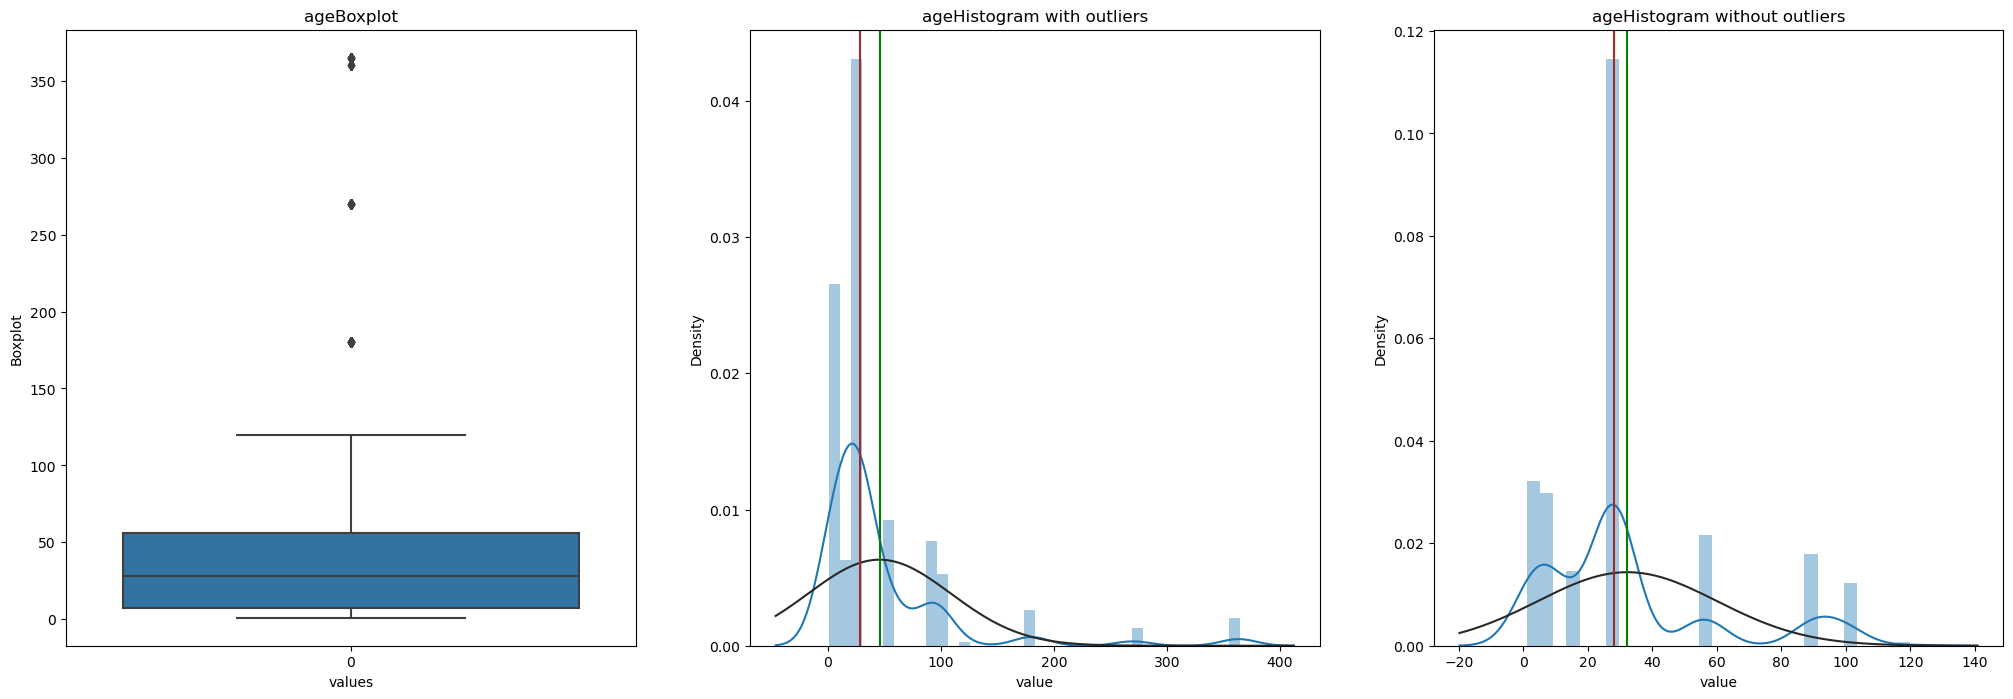

Feature strength HAs outliers


Total number of outliers in strength are 1030


outlier percentage in strength is 100.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
192    315.0  137.0  0.0  145.0           5.9     1130.0    745.0   28   
732    540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28   
950    389.9  189.0  0.0  145.9          22.0      944.7    755.8   91   
1003   323.7  282.8  0.0  183.8          10.3      942.7    659.9   56   

      strength  
192      81.75  
732      79.99  
950      82.60  
1003     80.20

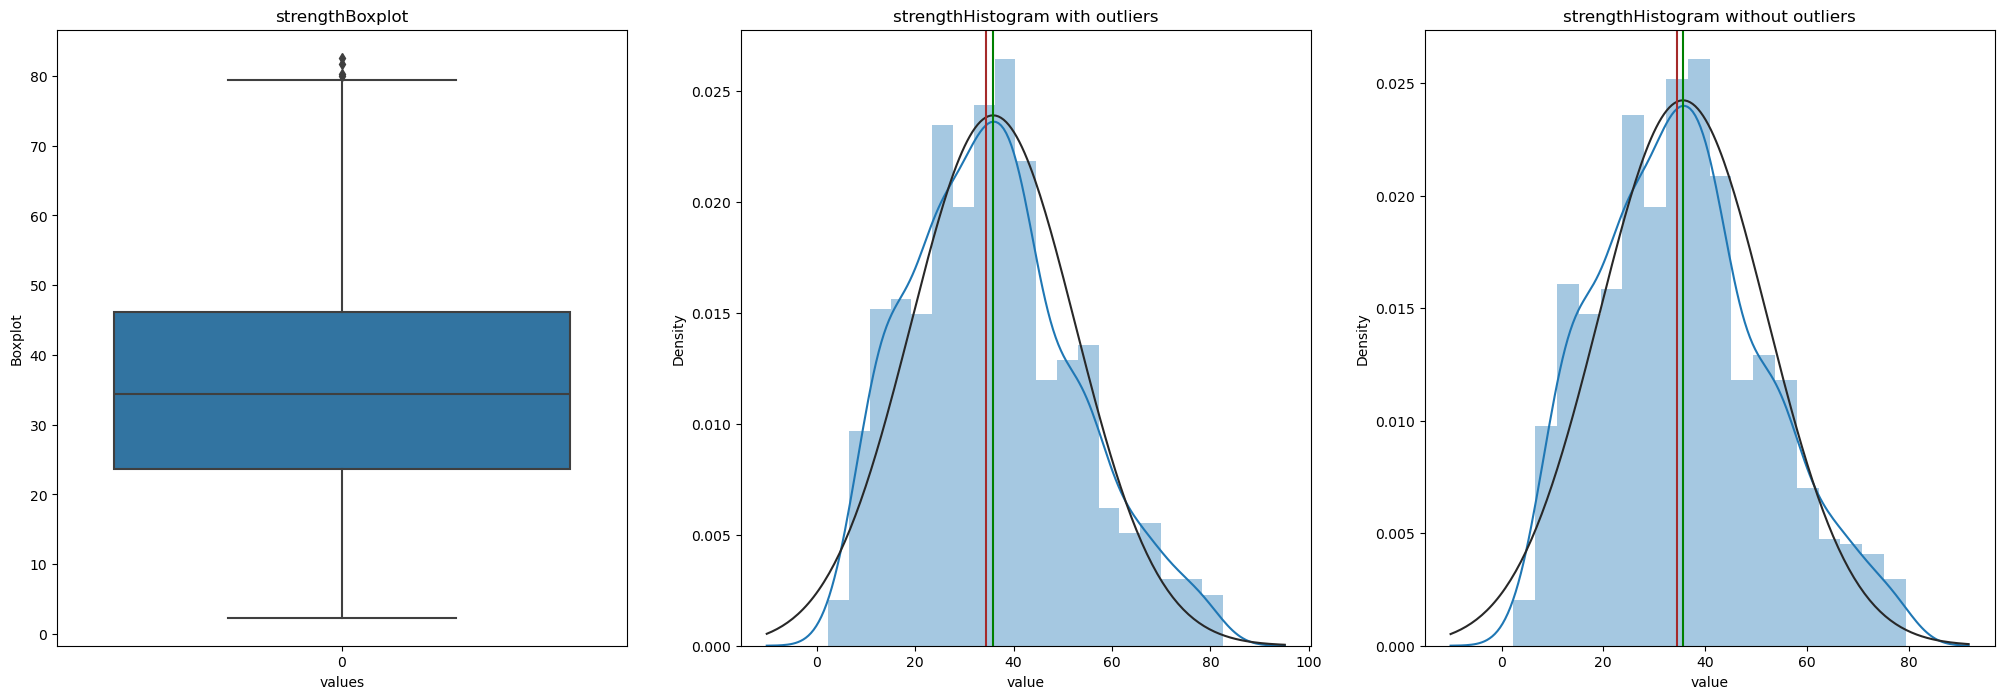

In [18]:
for col in df.columns:
    odt_plots(df,col)

In [19]:
# Multi veriant Analysis Using Regression

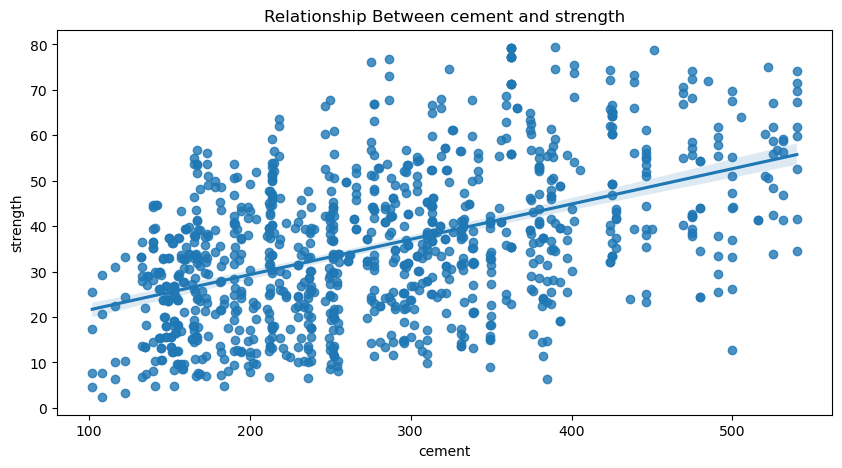

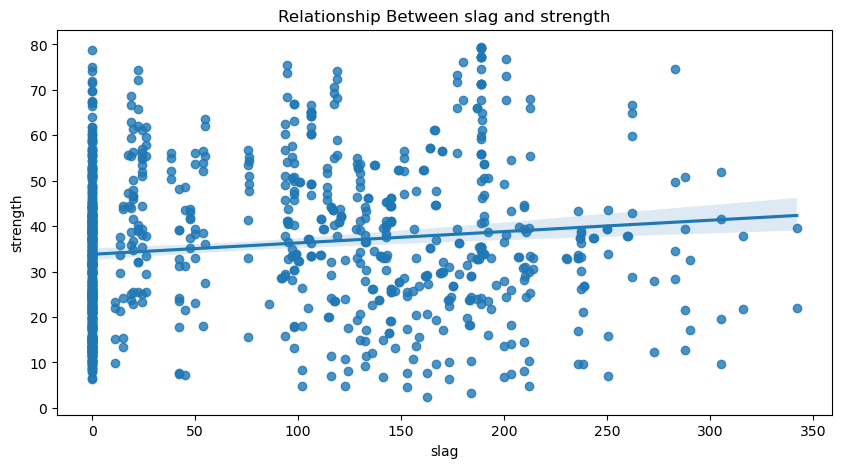

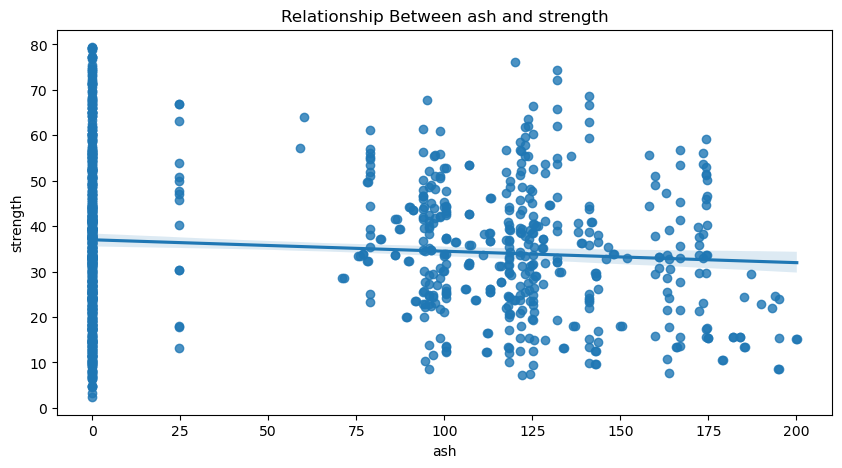

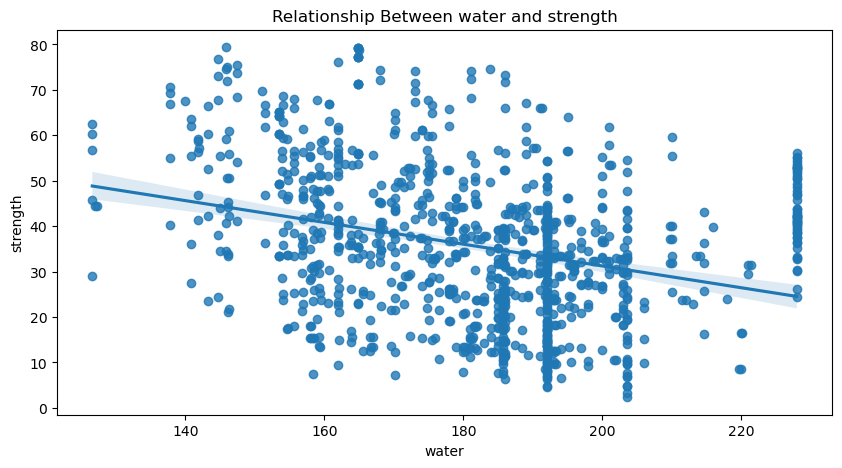

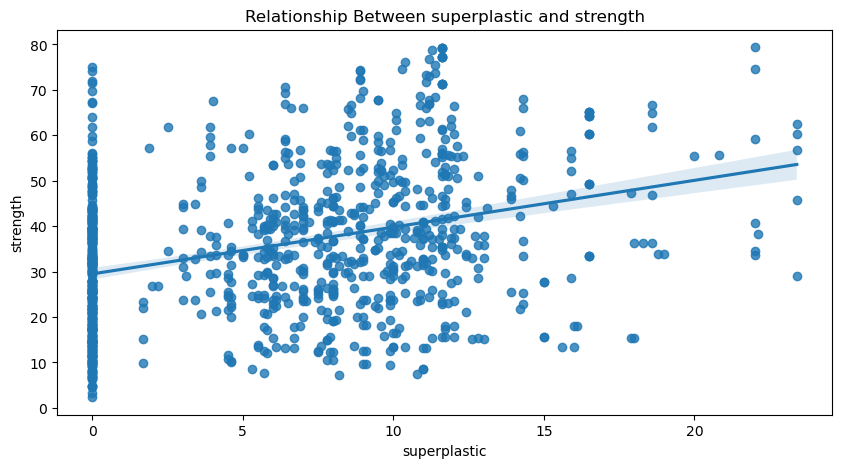

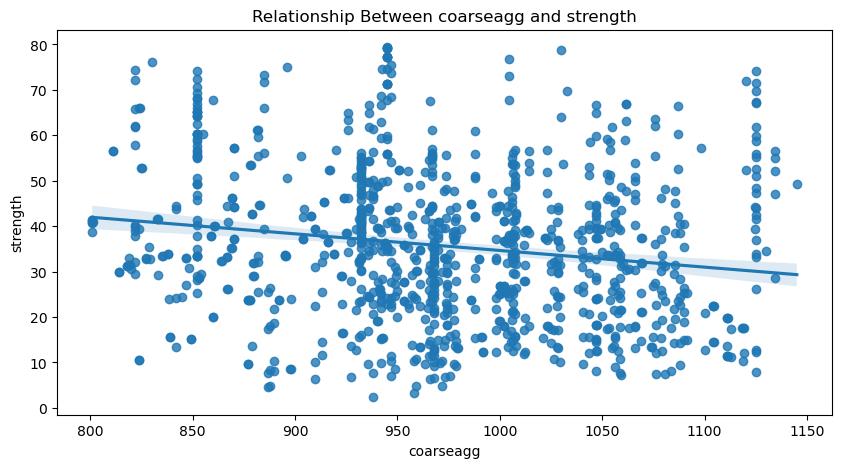

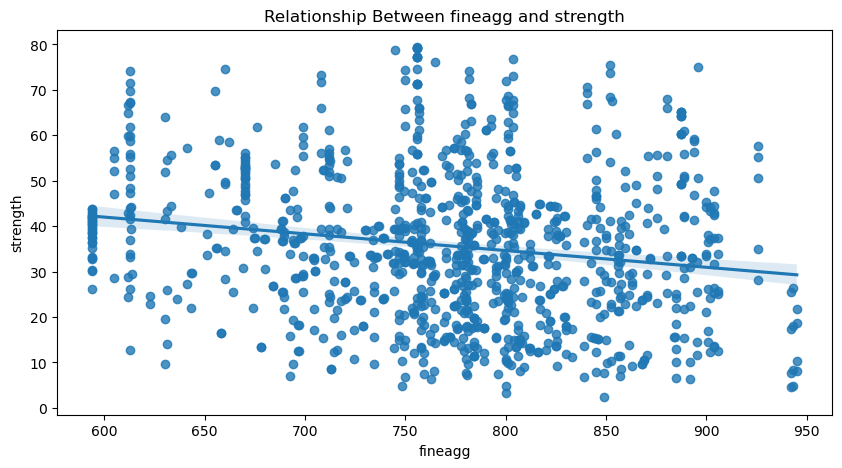

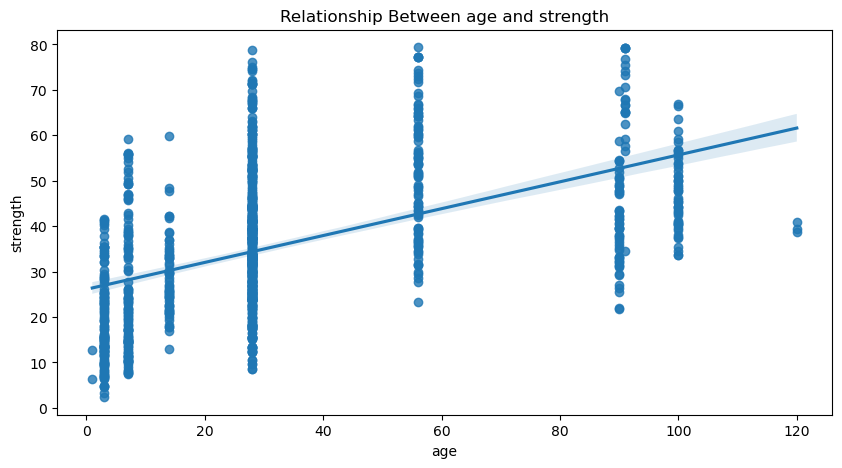

In [20]:
for col in df.columns:
    if  col != 'strength':
        fig,ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x =df[col], y = df['strength'], ax = ax1).set_title(f'Relationship Between {col} and strength')
        

In [21]:
# Multicollinerity Test


In [22]:
# Corelation Matrix

<Axes: >

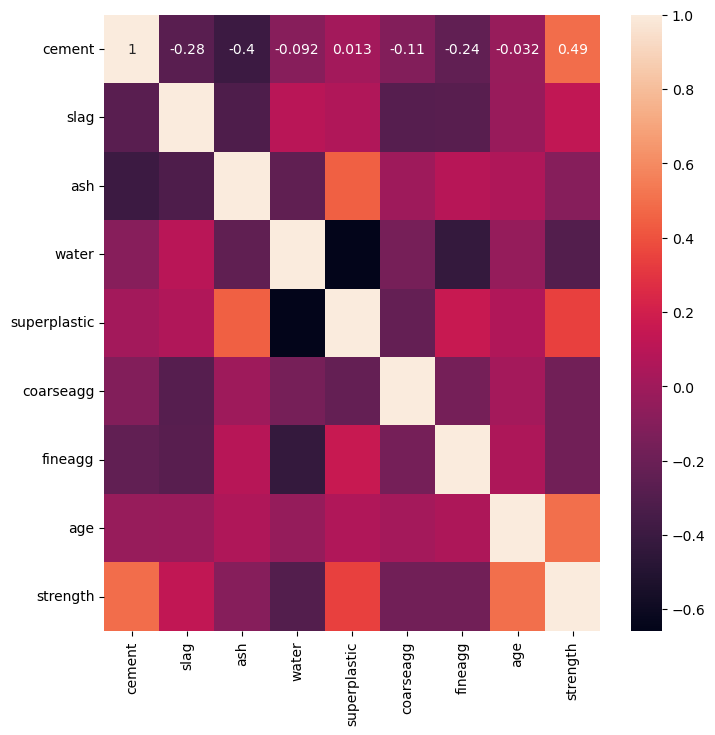

In [23]:
corr = df.corr()
df.ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, annot = True)
                     

In [24]:
# Multicollinerity Test

 - 1. VAriance Inflation Factor

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
def VIF(features):
    vif = pd.DataFrame(columns = ['vif', 'features'])
    vif.iloc[:,0] = [variance_inflation_factor(features, i ) for i in range(features.shape[1])]
    vif.iloc[0:,1] = features.columns
    return vif

In [27]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [28]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending = False)
    return vif

In [29]:
calculate_vif(df.drop('strength', axis =1))

features  VIF_Values
5     coarseagg       86.94
3         water       81.96
6       fineagg       68.66
0        cement       14.29
4  superplastic        5.72
2           ash        4.42
1          slag        3.34
7           age        2.37

In [30]:
# Corellation with the terget feature

In [31]:
def correlation_with_terget(data, t_col):
    independant_variables = data.drop(t_col,axis =1).columns
    corr_result = []
    for col in independant_variables:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independant_variables, corr_result], index = ['Independant Variable', 'correlation']).T
    return result

In [32]:
correlation_with_terget(df, 'strength')

Independant Variable correlation
0               cement    0.493518
1                 slag    0.129561
2                  ash   -0.097973
3                water   -0.300043
4         superplastic    0.342633
5            coarseagg   -0.173234
6              fineagg   -0.176113
7                  age    0.499711

In [33]:
# Applying PCA

In [34]:
def custom_PCA(X):
    n_comp = len(X.columns)
    #Applying standard scaler
    sc= StandardScaler()
    X = sc.fit_transform(X)
    for i in range(1,n_comp):
        pca = PCA(n_components =i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            pcs =i
            break
    print('Explained Variance Ratio after PCA is:', evr)

# Creating a dataframe
    col = []
    for j in range(1, pcs+1):
        col.append('PC_' + str(j))
    pca_df = pd.DataFrame(p_comp, columns =col)
    return pca_df

In [35]:
pca_df = custom_PCA(df.drop('strength', axis =1))

Explained Variance Ratio after PCA is: [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [36]:
pca_df.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6
0  1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110
1 -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061
2 -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045
3  2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548
4  0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228

In [37]:
calculate_vif(pca_df)

features  VIF_Values
0     PC_1         1.0
1     PC_2         1.0
2     PC_3         1.0
3     PC_4         1.0
4     PC_5         1.0
5     PC_6         1.0

In [38]:
pca_df = pca_df.join(df['strength'], how = 'left')

In [39]:
pca_df.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  strength
0  1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110     29.89
1 -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061     23.51
2 -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045     29.22
3  2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548     45.85
4  0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228     18.29

In [40]:
# Model Building

In [41]:
def train_and_test_split(data, tcol , testsize = 0.3, randomstate = 3):
    X = data.drop(tcol, axis = 1)
    y= data[tcol]
    return train_test_split(X,y,test_size =testsize, random_state = randomstate)

In [42]:
def model_builder(model_name, model, data,t_col):
    X_train, X_test, y_train, y_test = train_and_test_split(data, t_col)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = [model_name,rmse,  r2]
    return result

In [43]:
model_builder(model_name = 'LinearRegression', model = LinearRegression(), data = pca_df, t_col = 'strength')

['LinearRegression', 9.098029413143962, 0.7005612990763812]

In [44]:
def multiple_model(data, t_col):
    col_names = ['Model Name', 'RMSE', 'R2 Score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression', LinearRegression(), data, t_col)
    result.loc[len(result)] = model_builder('Lesso', Lasso(), data, t_col)
    result.loc[len(result)] = model_builder('Ridge', Ridge(), data, t_col)
    result.loc[len(result)] = model_builder('DTR', DecisionTreeRegressor(), data, t_col)
    result.loc[len(result)] = model_builder('SVR', SVR(), data, t_col)
    result.loc[len(result)] = model_builder('Random_forest', RandomForestRegressor(), data, t_col)
    result.loc[len(result)] = model_builder('Gradiant Boosting', GradientBoostingRegressor(), data, t_col)
    result.loc[len(result)] = model_builder('XGboost', XGBRegressor(), data, t_col)
    result.loc[len(result)] = model_builder('AdaBoost', AdaBoostRegressor(), data, t_col)
    return result.sort_values('R2 Score', ascending = False)

In [45]:
multiple_model(pca_df, 'strength')

Model Name      RMSE  R2 Score
7            XGboost  5.903539  0.873922
5      Random_forest  6.363037  0.853532
6  Gradiant Boosting  6.670626  0.839029
8           AdaBoost  8.814523  0.718932
3                DTR  9.001333  0.706892
0  Linear Regression  9.098029  0.700561
2              Ridge  9.099976  0.700433
4                SVR  9.123982  0.698851
1              Lesso  9.494112  0.673922

In [46]:
# Cross Validation

In [47]:
def k_fold_cv(X,y,fold=10):
    score_LR = cross_val_score(LinearRegression(), X,y, cv=fold)
    score_LS = cross_val_score(Lasso(), X,y, cv=fold)
    score_RD = cross_val_score(Ridge(), X,y, cv=fold)
    score_DTR= cross_val_score(DecisionTreeRegressor(), X,y, cv=fold)
    score_SVR = cross_val_score(SVR(), X,y, cv=fold)
    score_RandomForest = cross_val_score(RandomForestRegressor(), X,y, cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(), X,y, cv=fold)
    score_GBoost = cross_val_score(GradientBoostingRegressor(), X,y, cv=fold)
    score_XGBoost = cross_val_score(XGBRegressor(), X,y, cv=fold)
    score_AdaBoost = cross_val_score(AdaBoostRegressor(), X,y, cv=fold)



    model_name = ['Linear Regression', 'Lasso', 'Ridge', 'dicision Tree', 'SVR', 'Random Forest', 'KNN', 'GBoost'
                 , 'XGBoost', 'AdaBoost']
    scores = [score_LR, score_LS ,score_RD ,score_DTR,score_SVR,score_RandomForest,score_KNN,score_GBoost,score_XGBoost,score_AdaBoost]
    result =[]
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name, score_mean,score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result, columns = ['Model Name', 'CV Accuracy', 'CV STD'])
    return k_fold_df.sort_values('CV Accuracy', ascending = False)

    
    

In [48]:
k_fold_cv(pca_df.drop('strength', axis =1), pca_df['strength'])

Model Name  CV Accuracy    CV STD
8            XGBoost     0.871087  0.045670
5      Random Forest     0.867262  0.031695
7             GBoost     0.828856  0.050383
6                KNN     0.768333  0.056132
3      dicision Tree     0.760747  0.061483
9           AdaBoost     0.726380  0.040518
4                SVR     0.703117  0.042765
2              Ridge     0.663935  0.059437
0  Linear Regression     0.663928  0.059476
1              Lasso     0.649837  0.049887

In [49]:
# Hyper Parameter Tuning

In [50]:
# For top 5 Best performing Model

In [51]:
def tuning(X,y,fold =10):
    param_LAS = {'alpha' : [1e-15,1e-13,1e-9,1e-7, 1,10,20,30,50,100,200,300,400,500]}
    param_KNN = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_DTR = {'max_depth': [3,5,7,9,10,12,14,16]}
    param_SVR = {'gamma': ['scale', 'auto'], 'C': [0.5,1]}
    param_ADB = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_GB = {'alpha': [0.1,0.2,0.3,0.4,0.5]}
    param_XGB = {'eta': [0.1,0.2,0.3,0.4,0.5], 'max_depth': [3,5,7,9,10,12,14,15,16], 'gamma': [10,20,30,40,50,60,70,80,90]}
    param_RF = {'max_depth': [3,5,7,9,10,12,14,16], 'max_features':['auto', 'log2', 'sqrt', 2,3,4,5,6]}

    # Hyperparameter tuning
    tune_LAS = GridSearchCV(Lasso(), param_LAS, cv =fold)
    tune_RID = GridSearchCV(Ridge(), param_LAS, cv =fold)
    tune_KNN = GridSearchCV(KNeighborsRegressor(), param_KNN, cv =fold)
    tune_DT  = GridSearchCV(DecisionTreeRegressor(), param_DTR, cv =fold)
    tune_SVR = GridSearchCV(SVR(), param_SVR, cv =fold)
    tune_ADB = GridSearchCV(AdaBoostRegressor(), param_ADB, cv =fold)
    tune_GB = GridSearchCV(GradientBoostingRegressor(), param_GB, cv =fold)
    tune_XGB = GridSearchCV(XGBRegressor(), param_ADB, cv =fold)
    tune_RF  = GridSearchCV(RandomForestRegressor(), param_RF, cv =fold)

    #fitting X,y
    tune_LAS.fit(X,y)
    tune_RID.fit(X,y)
    tune_KNN.fit(X,y)
    tune_DT.fit(X,y)
    tune_SVR.fit(X,y)
    tune_ADB.fit(X,y)
    tune_GB.fit(X,y)
    tune_XGB.fit(X,y)
    tune_RF.fit(X,y)

    tune = [tune_LAS,tune_RID,tune_KNN,tune_DT,tune_SVR,tune_ADB,tune_GB,tune_XGB,tune_RF]
    models = ['Lasso', 'Ridge', 'Kneighbors', 'DTR', 'SVR', 'ADBR', 'GBR', 'XGBR', 'RFR']
    for i in range(len(tune)):
        print('models:', models[i])
        print('best parameters', tune[i].best_params_)

    
    
    
    
    

In [52]:
tuning(pca_df.drop('strength', axis=1), pca_df['strength'])

models: Lasso
best parameters {'alpha': 1e-07}
models: Ridge
best parameters {'alpha': 10}
models: Kneighbors
best parameters {'n_neighbors': 4}
models: DTR
best parameters {'max_depth': 10}
models: SVR
best parameters {'C': 1, 'gamma': 'scale'}
models: ADBR
best parameters {'learning_rate': 1}
models: GBR
best parameters {'alpha': 0.3}
models: XGBR
best parameters {'learning_rate': 0.4}
models: RFR
best parameters {'max_depth': 14, 'max_features': 4}


In [53]:
# cross Validation Post_Hyperparameter tuning

In [54]:
def cv_post_hyper(X,y,fold=10):
    score_LR = cross_val_score(LinearRegression(), X,y, cv=fold)
    score_LS = cross_val_score(Lasso(alpha = 10), X,y, cv=fold)
    score_RD = cross_val_score(Ridge(alpha = 10), X,y, cv=fold)
    score_DTR= cross_val_score(DecisionTreeRegressor(max_depth = 10), X,y, cv=fold)
    score_SVR = cross_val_score(SVR(C = 1, gamma = 'scale'), X,y, cv=fold)
    score_RandomForest = cross_val_score(RandomForestRegressor(max_depth = 14, max_features= 3), X,y, cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(n_neighbors = 4), X,y, cv=fold)
    score_GBoost = cross_val_score(GradientBoostingRegressor(alpha = 0.5), X,y, cv=fold)
    score_XGBoost = cross_val_score(XGBRegressor(learning_rate = 0.4), X,y, cv=fold)
    score_AdaBoost = cross_val_score(AdaBoostRegressor(learning_rate = 0.9), X,y, cv=fold)



    model_name = ['Linear Regression', 'Lasso', 'Ridge', 'dicision Tree', 'SVR', 'Random Forest', 'KNN', 'GBoost'
                 , 'XGBoost', 'AdaBoost']
    scores = [score_LR, score_LS ,score_RD ,score_DTR,score_SVR,score_RandomForest,score_KNN,score_GBoost,score_XGBoost,score_AdaBoost]
    result =[]
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name, score_mean,score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result, columns = ['Model Name', 'CV Accuracy', 'CV STD'])
    return k_fold_df.sort_values('CV Accuracy', ascending = False)


In [55]:
cv_post_hyper(pca_df.drop('strength', axis =1), pca_df['strength'])

Model Name  CV Accuracy    CV STD
8            XGBoost     0.874483  0.048971
5      Random Forest     0.869643  0.033166
7             GBoost     0.829080  0.050362
6                KNN     0.770936  0.054661
3      dicision Tree     0.761779  0.055588
9           AdaBoost     0.728320  0.032544
4                SVR     0.703117  0.042765
2              Ridge     0.663940  0.059088
0  Linear Regression     0.663928  0.059476
1              Lasso    -0.022100  0.037875

In [56]:
# Clustering Approch Kmeans we are going to check the accury can be incresed or not

In [57]:
pca_df.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  strength
0  1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110     29.89
1 -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061     23.51
2 -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045     29.22
3  2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548     45.85
4  0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228     18.29

<Axes: xlabel='cement', ylabel='strength'>

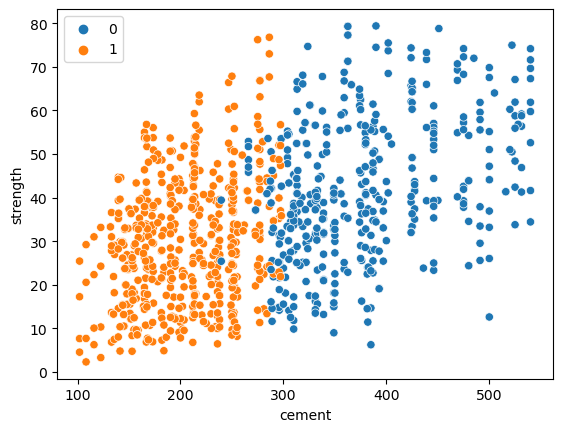

In [63]:
kmeans = KMeans(n_clusters = 2, random_state =2)
clusters = kmeans.fit_predict(df.drop('strength', axis =1))
sns.scatterplot(x =df['cement'], y = df['strength'], hue = clusters)


In [66]:
def clustering(X, tcol, clusters):
    column = list(set(list(X.columns)) - set(X['strength']))
    r = int(len(column) / 2)
    if r % 2 == 0:
        r =r
    else:
        r += 1

    f,ax = plt.subplots(r, 2, figsize = (15,15))
    a=0
    for row in range(r):
        for col in range(0,2):
                if a!= len(column):
                    ax[row][col].scatter(X[tcol], X[column[a]], c = clusters)
                    ax[row][col].set_xlabel(tcol)
                    ax[row][col].set_ylabel(column[a])
                    a +=1
                    

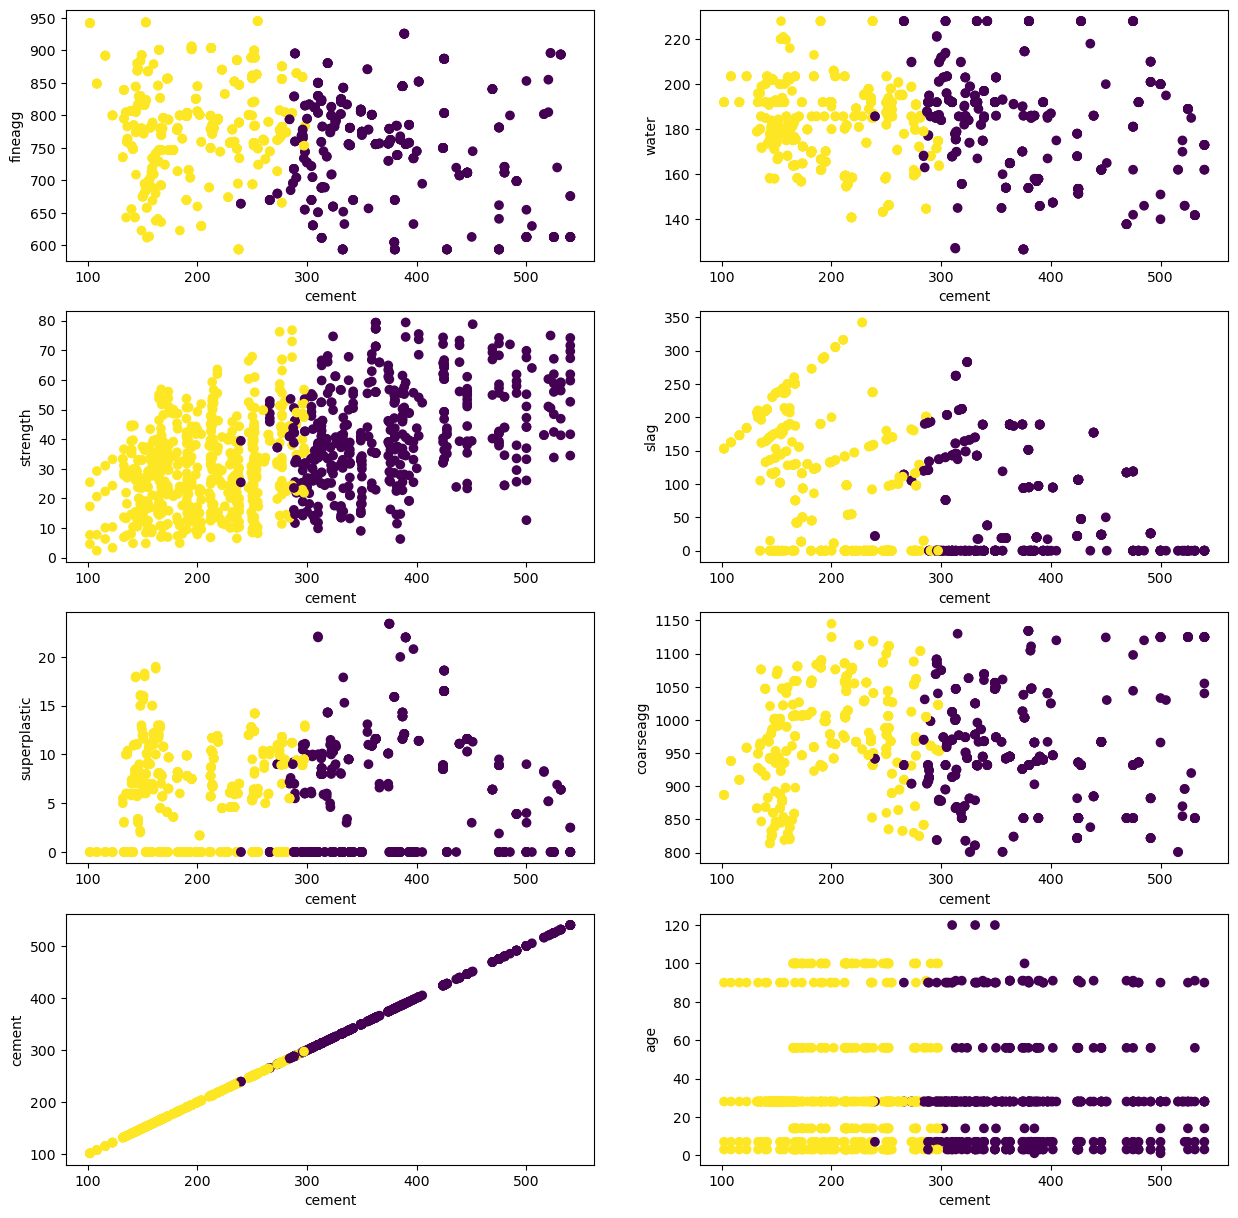

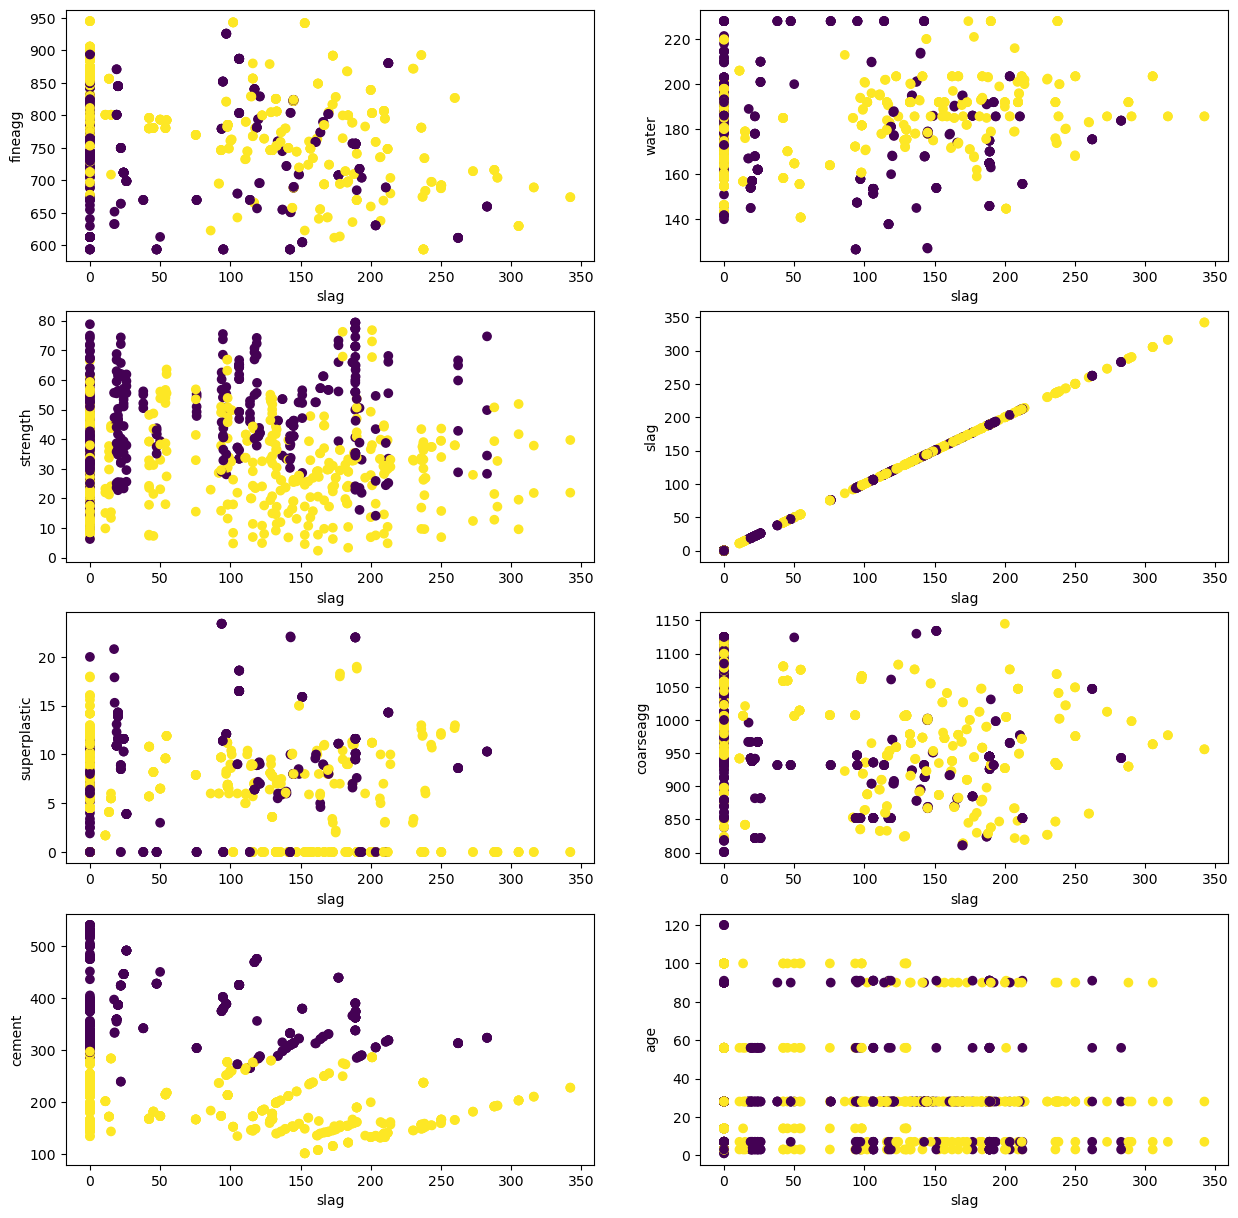

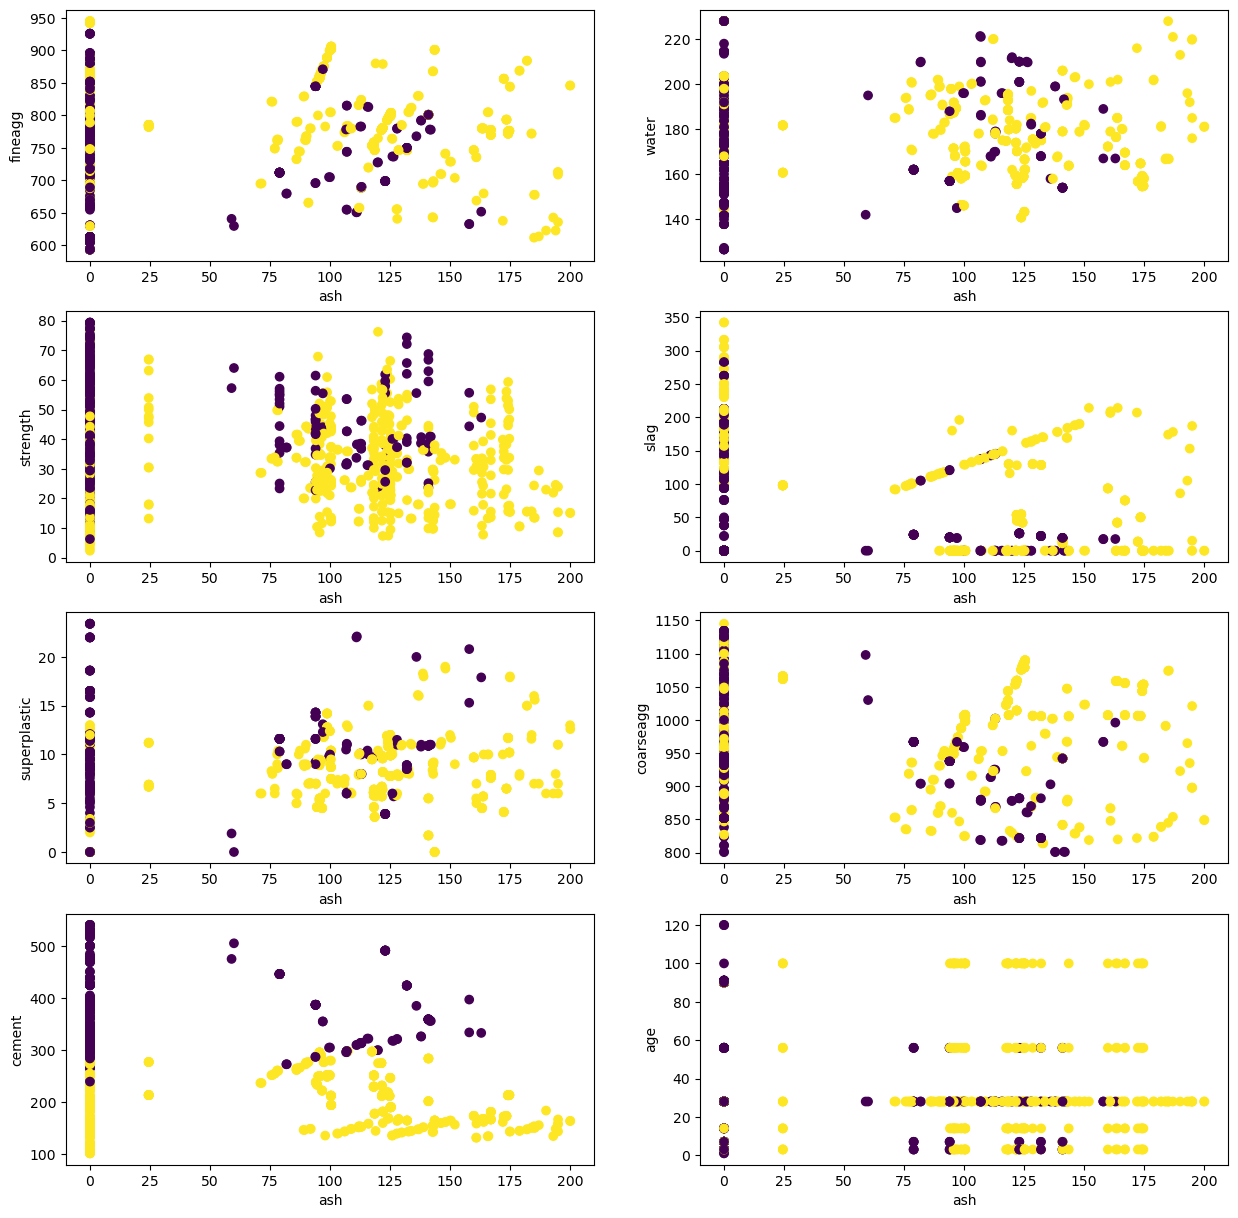

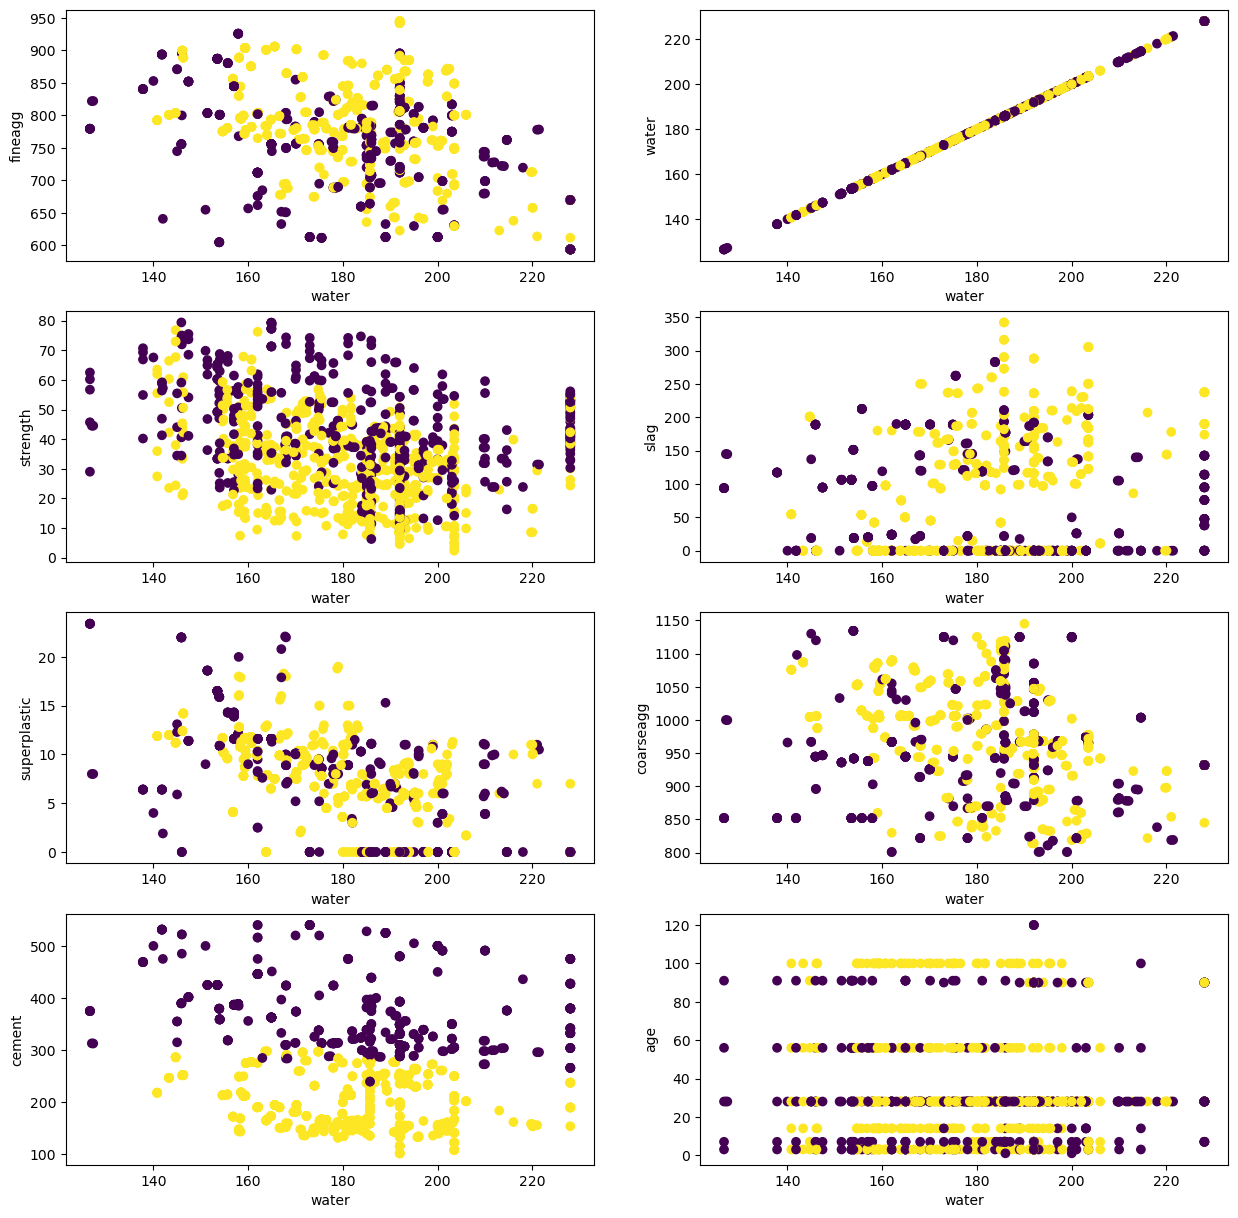

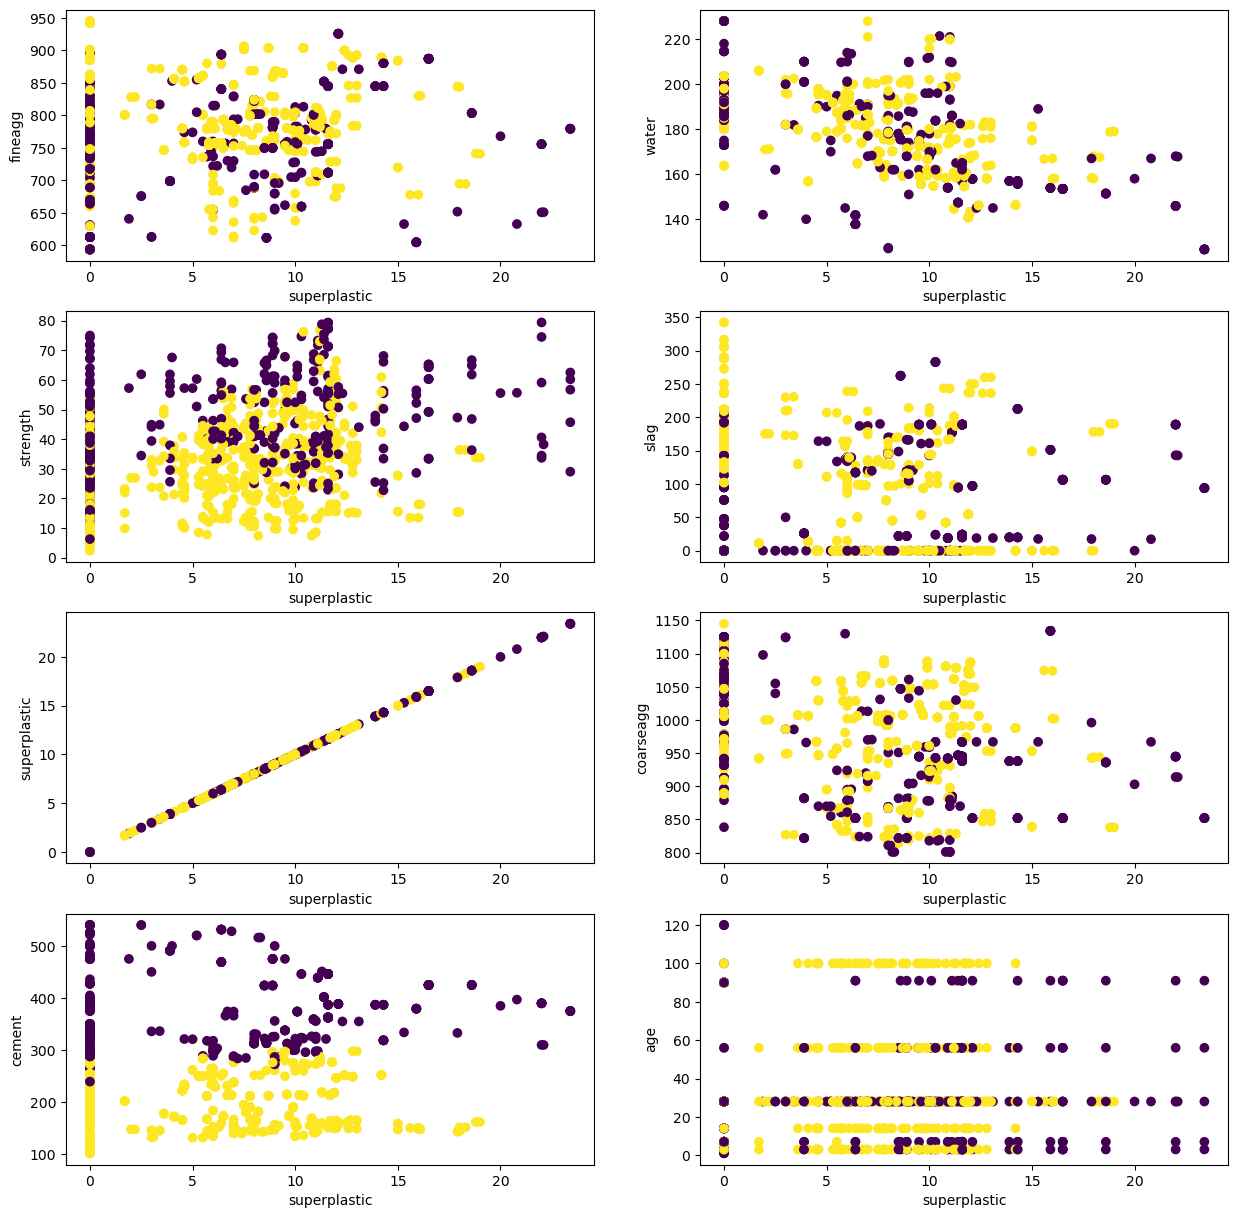

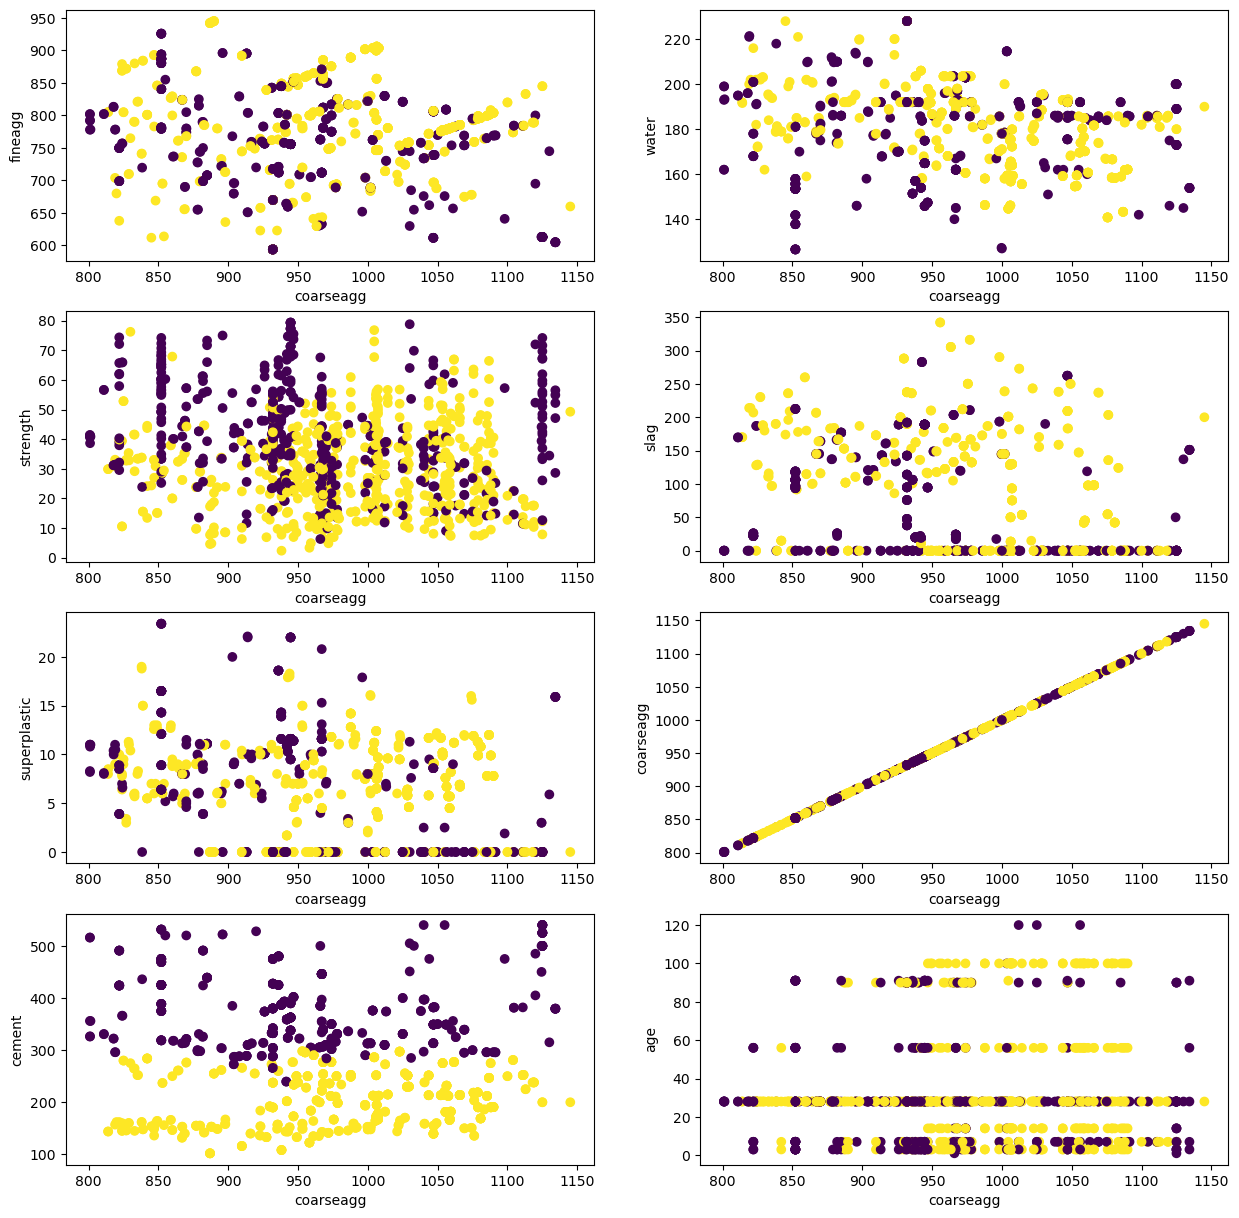

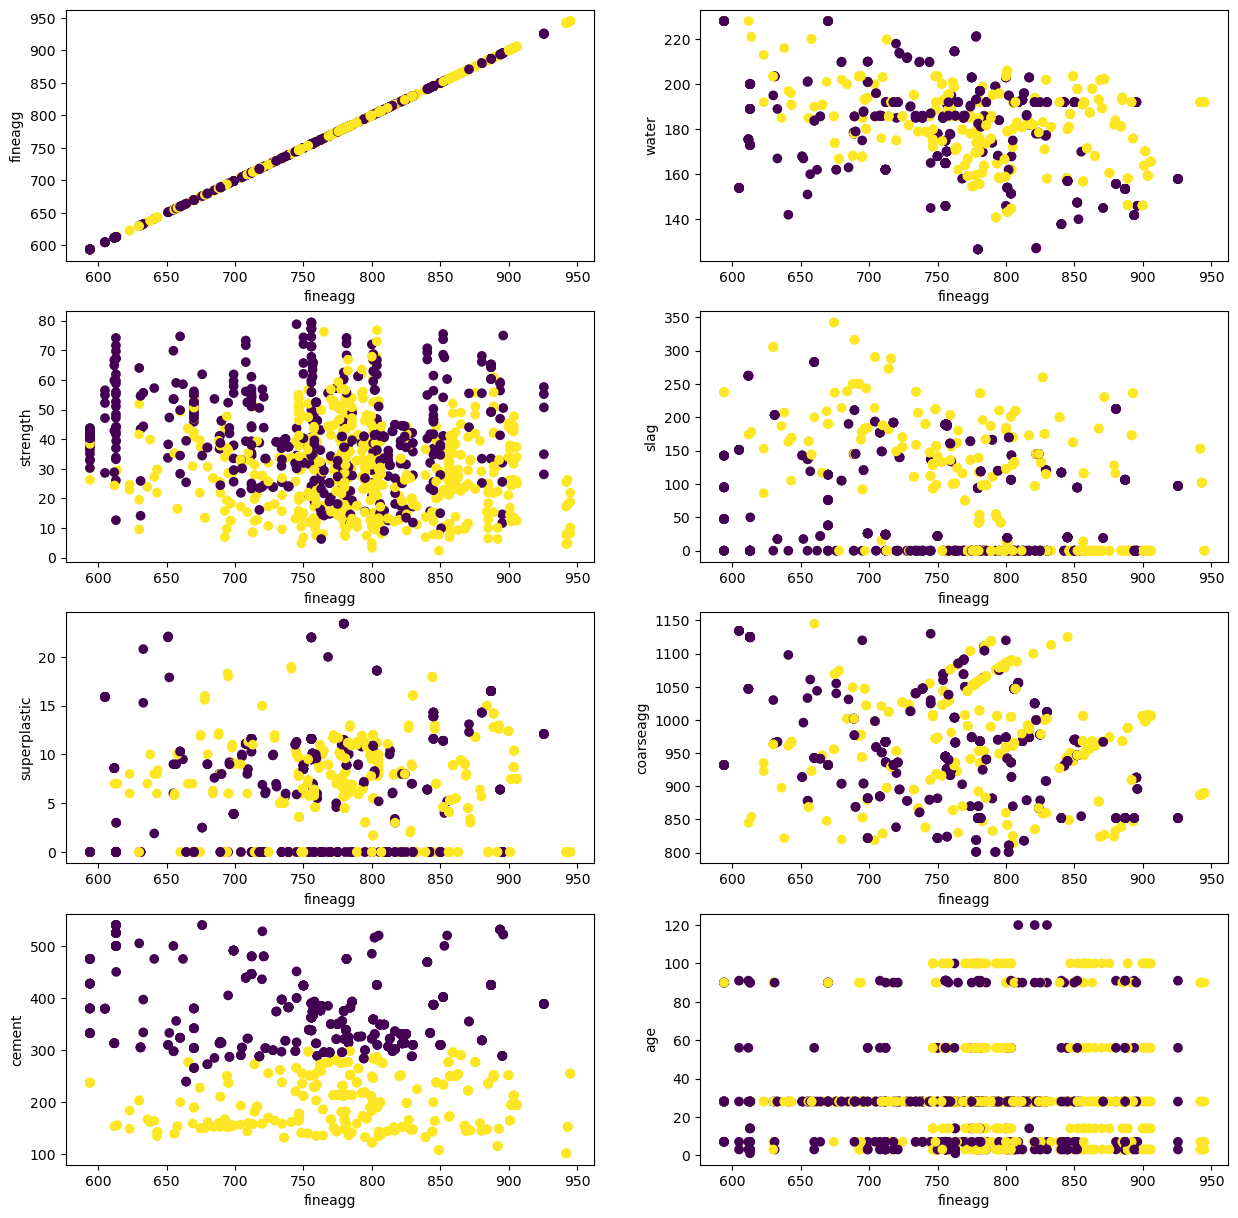

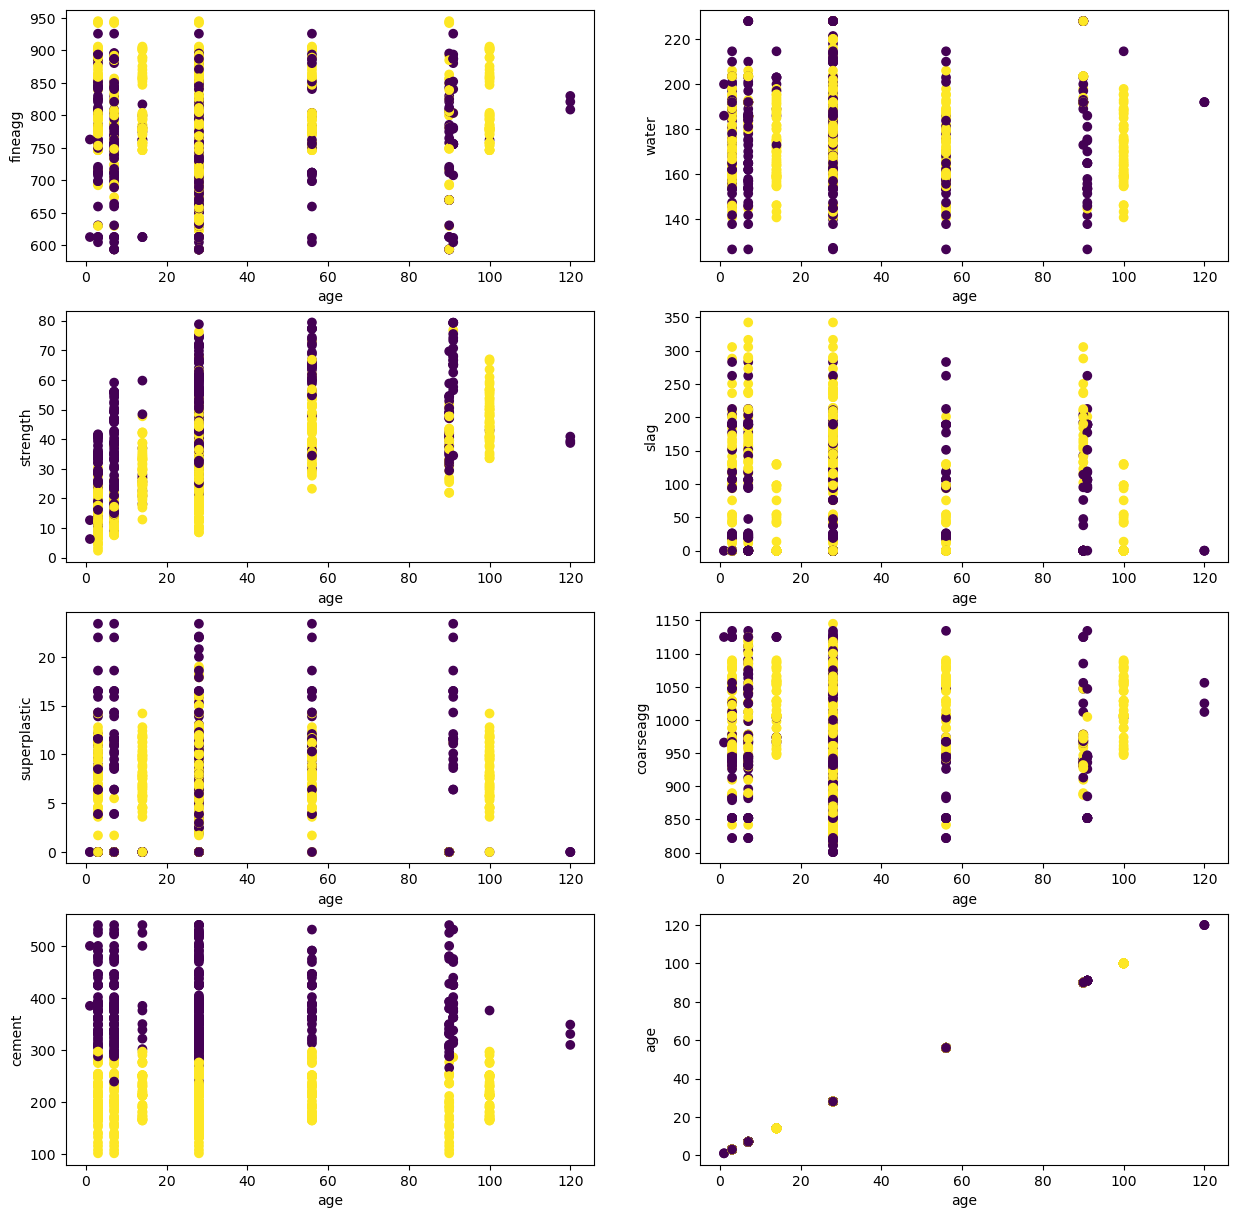

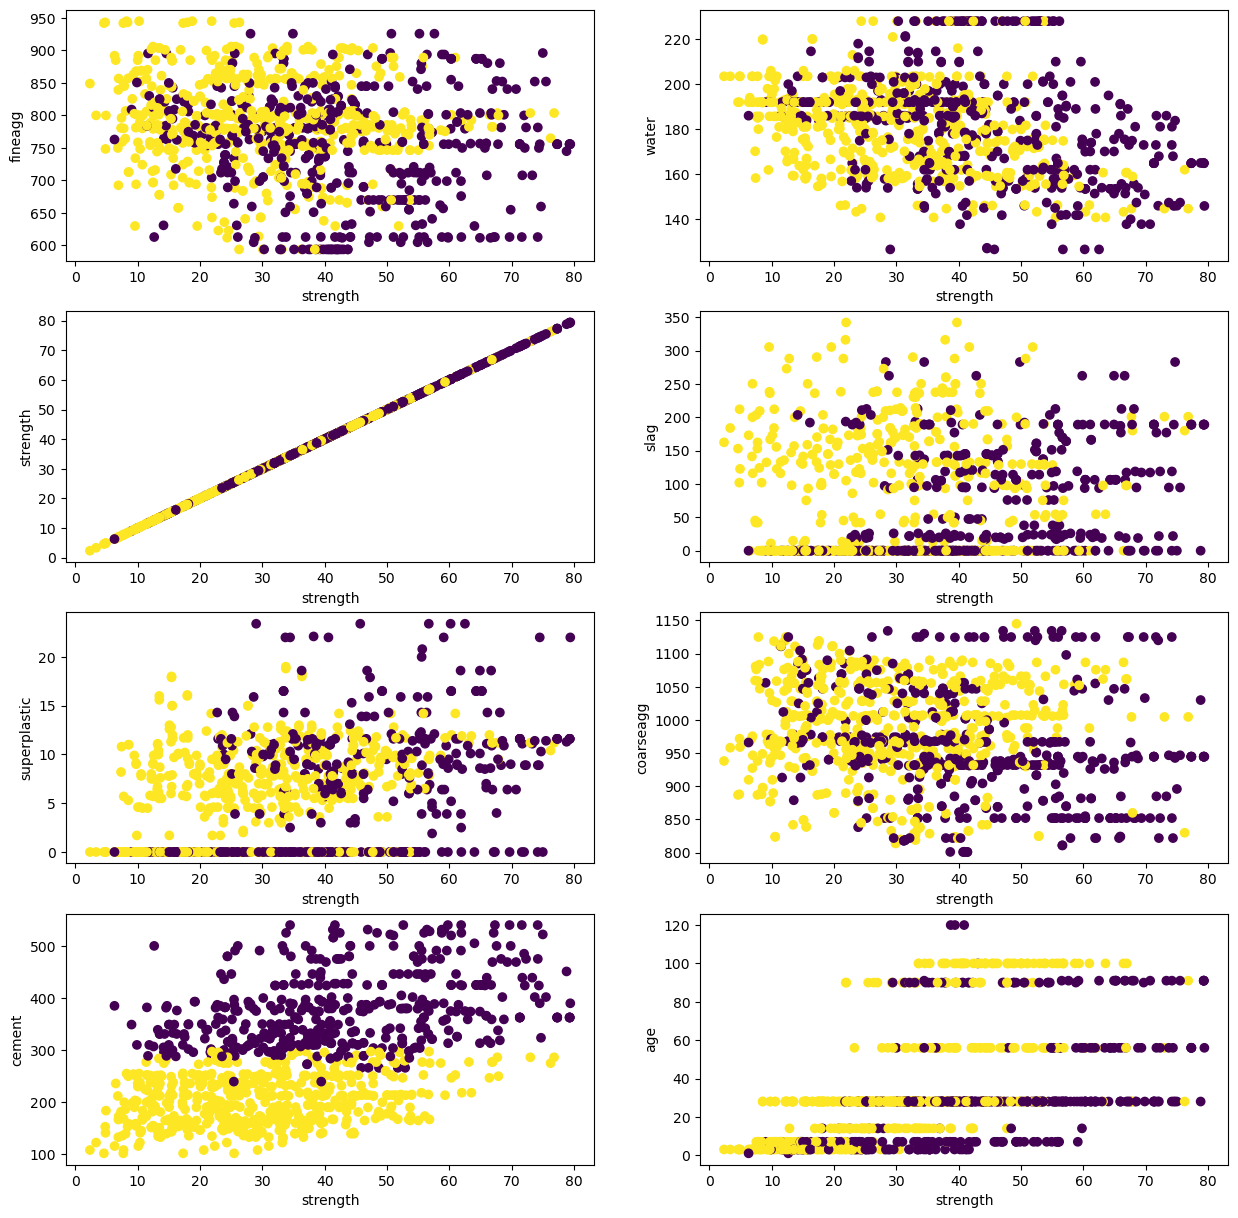

In [67]:
X = df.drop('strength', axis =1)
for col in df.columns:
    clustering(df,col,clusters)

- Analysis is cement clustering with other indipendent variables

In [69]:
new_df = df.join(pd.DataFrame(clusters, columns = ['clusters']), how ='left')
new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  clusters  
0     29.89         1  
1     23.51         1  
2     29.22         1  
3     45.85         0  
4     18.29         1

In [72]:
cluster_agg = new_df.groupby('clusters')['cement'].agg(['mean', 'median'])
cluster_agg.head()

mean  median
clusters                    
0         376.731317   362.6
1         203.132804   202.0

In [73]:
cluster_df = new_df.merge(cluster_agg, on = 'clusters', how = 'left')
cluster_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  clusters        mean  median  
0     29.89         1  203.132804   202.0  
1     23.51         1  203.132804   202.0  
2     29.22         1  203.132804   202.0  
3     45.85         0  376.731317   362.6  
4     18.29         1  203.132804   202.0

In [76]:
multiple_model(cluster_df.drop('clusters', axis =1), 'strength')

Model Name       RMSE  R2 Score
7            XGboost   5.254944  0.900104
5      Random_forest   5.648660  0.884574
6  Gradiant Boosting   5.866594  0.875495
3                DTR   6.770470  0.834175
8           AdaBoost   8.410669  0.744098
0  Linear Regression   8.783513  0.720906
2              Ridge   8.783872  0.720884
1              Lesso   8.798093  0.719979
4                SVR  14.324008  0.257763

In [77]:
X = cluster_df.drop(['strength', 'clusters'], axis =1)

In [80]:
y = cluster_df['strength']
k_fold_cv(X,y)

Model Name  CV Accuracy    CV STD
8            XGBoost     0.897941  0.038628
5      Random Forest     0.887079  0.034609
7             GBoost     0.875700  0.044951
3      dicision Tree     0.830890  0.048806
9           AdaBoost     0.739095  0.036172
2              Ridge     0.686641  0.062314
1              Lasso     0.686437  0.062413
0  Linear Regression     0.686340  0.062138
6                KNN     0.669227  0.087720
4                SVR     0.246843  0.044778

Understanding Feature importance using XGBoost

In [81]:
x_train, x_test, y_train,y_test = train_and_test_split(cluster_df.drop(['clusters'], axis =1), 'strength')

In [83]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

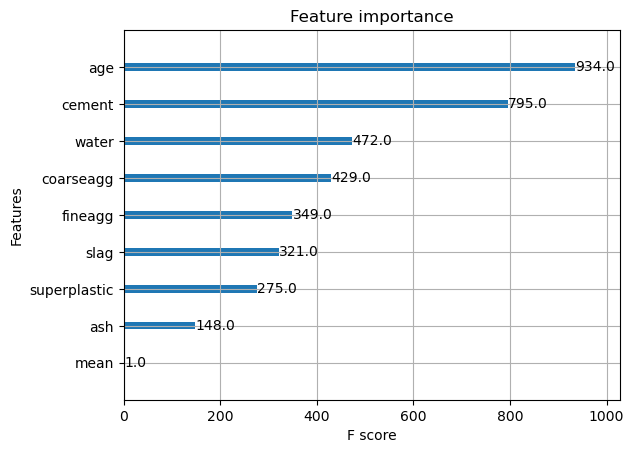

In [84]:
xgboost.plot_importance(xgb)

In [87]:
imp_features = cluster_df[['age', 'cement', 'water', 'coarseagg', 'fineagg', 'strength']]

In [88]:
cv_post_hyper(imp_features.drop('strength', axis =1), imp_features['strength'])

Model Name  CV Accuracy    CV STD
8            XGBoost     0.882903  0.036487
5      Random Forest     0.870277  0.033131
7             GBoost     0.842285  0.039699
3      dicision Tree     0.796431  0.076009
9           AdaBoost     0.704375  0.037576
2              Ridge     0.657579  0.060464
0  Linear Regression     0.657579  0.060465
1              Lasso     0.655529  0.057017
6                KNN     0.652519  0.088818
4                SVR     0.252828  0.044987

In [89]:
## Building learning curve analysis

In [96]:
def generate_learning_curve(model_name, estimator, X,y):
    train_size , train_score, test_score = learning_curve( estimator = estimator, X =X, y=y,cv=10)
    train_score_mean = np.mean(train_score, axis =1)
    test_score_mean = np.mean(test_score, axis =1)
    plt.plot(train_size, train_score_mean, c = 'blue')
    plt.plot(train_size, test_score_mean, c = 'red')
    plt.xlabel('Samples')
    plt.ylabel('R2 Score')
    plt.title('learning Curve for' + model_name)
    plt.legend('Training R2 Score', 'Testing R2 Score')

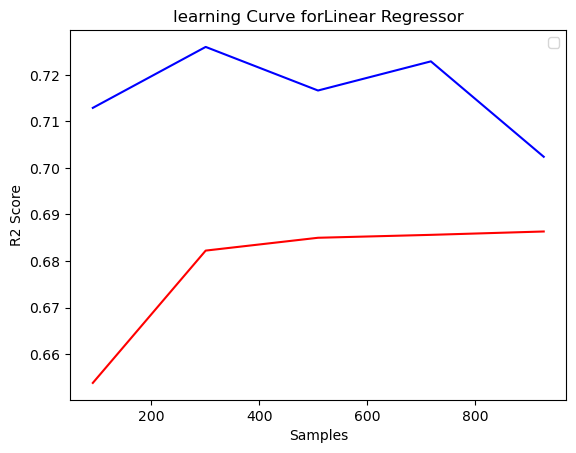

In [97]:
generate_learning_curve('Linear Regressor', LinearRegression(), cluster_df.drop(['clusters', 'strength'], axis =1), cluster_df['strength'])

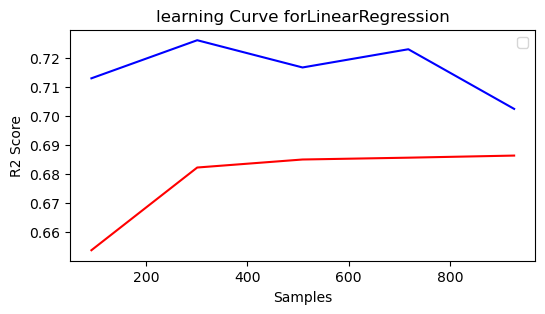

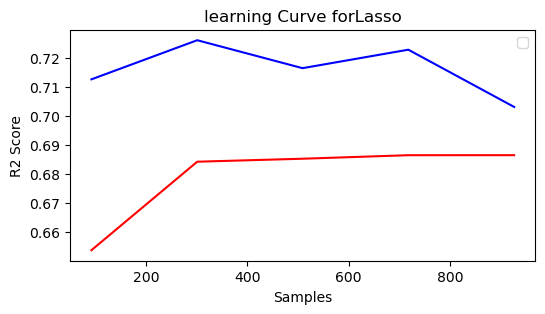

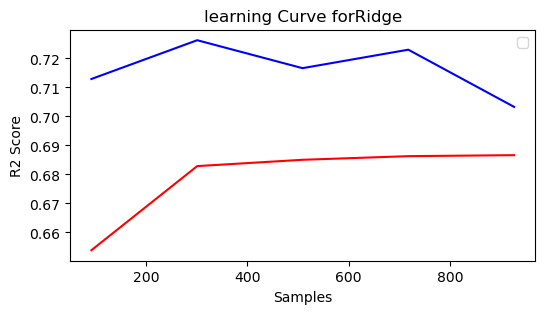

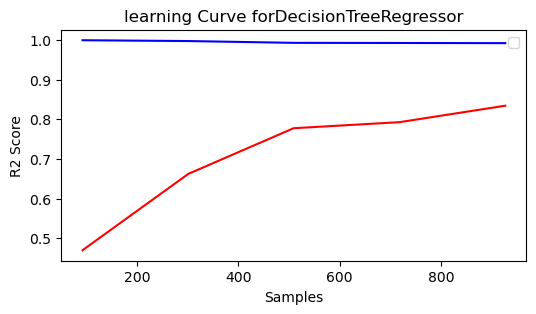

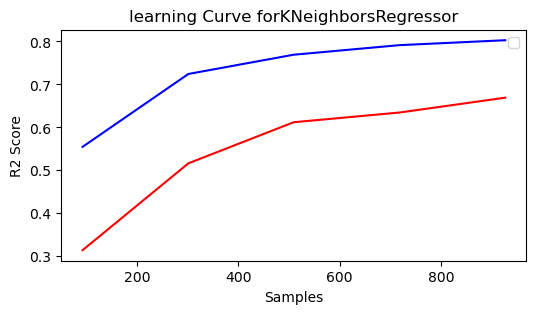

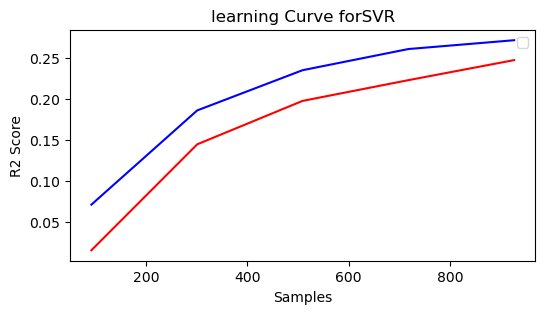

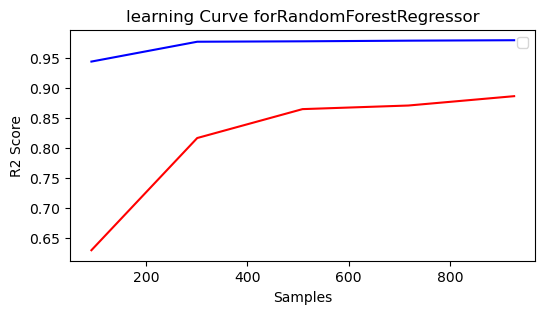

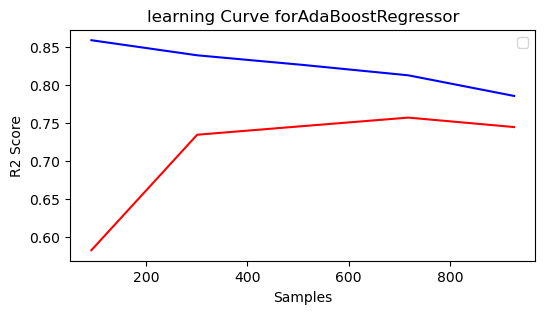

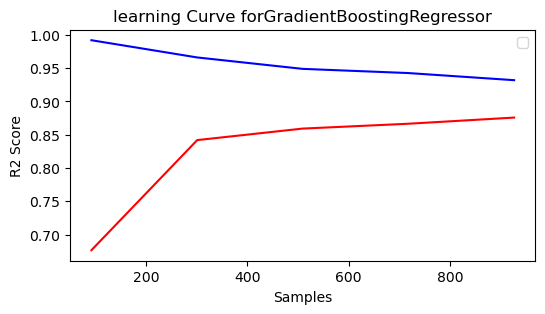

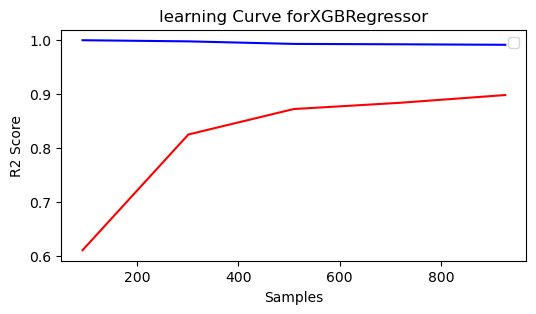

In [102]:
models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor()]
for a,model in enumerate(models):
    fg =plt.figure(figsize = (6,3))
    ax=fig.add_subplot(10,1,a+1)
    generate_learning_curve(type(models[a]).__name__, model, cluster_df.drop(['clusters', 'strength'], axis =1), cluster_df['strength'])